### Introduction

This assignment focuses on data understanding and preparation for data from an animal shelter. This animal shelter is concerned with reducing the risk of animal death and is working towards building an anayltics solution for death risk prediction in order to improve the welfare of animals entering the shelter. 

Throughout this assignment I will be using various data analytics soliutions in order to prepare the data so that it can be used to predict the outcome of the animal. The outcome is represented by the feature 'binary_outcome' with '1' representing a negative outcome and '0' representing a positive outcome.

I will begin the assignment with some data exploration. I will perform various data analytics steps in order to get to know the data and understand it better. I will then discuss any issues which I have found in the data and will then apply data analytics solutions in order to clean the data. 

This will be followed by an exploration of any relationships between the cleaned features. Finally, the assignment will finish with the creation of some new features which I feel will be useful in predicting the binary outcome of these animals. 

We will begin by importing the packages required for this assignment. 

In [1]:
#import the following packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sn
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

We will now read the data from a csv file. 

In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv('AnimalWelfareRisk-19205514.csv')

# (1) Prepare a data quality report for the csv file.

### Check shape of csv file

In [3]:
# This checks how many rows and columns this dataframe has
df.shape

(1000, 22)

This tells us the dataset has 1000 rows and 22 columns. 

### Print the first and last 5 rows of CSV file.

We will now print the first and last 5 rows of the dataset. 

In [4]:
# print first 5 rows
df.head(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
0,A687076,Katy,08/30/2014 05:55:00 PM,08/30/2014 05:55:00 PM,Acorn Oaks And Cooper in Austin (TX),Stray,Normal,Cat,Intact Female,2 months,...,Katy,09/05/2014 14:33,09/05/2014 14:33,06/15/2014,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Torbie,0
1,A685139,NaN,08/03/2014 11:23,08/03/2014 11:23,Pleasant Valley/Oltorf in Austin (TX),Stray,Other,Dog,Intact Female,3 months,...,NaN,08/07/2014 18:09,08/07/2014 18:09,05/03/2014,Dog,Spayed Female,3 months,Cavalier Span Mix,White/Black,0
2,A741039,Dexter,12/27/2016 11:18:00 AM,12/27/2016 11:18:00 AM,12Th St And Airport Blvd in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,...,Dexter,01/01/2017 15:27,01/01/2017 15:27,12/27/2015,Dog,Intact Male,1 year,Jack Russell Terrier,Black/White,0
3,A759166,Archie,09/28/2017 11:03:00 AM,09/28/2017 11:03:00 AM,Brockman And Pompton in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,...,Archie,11/04/2017 18:11,11/04/2017 18:11,07/28/2017,Cat,Neutered Male,3 months,Domestic Shorthair,Black,0
4,A696479,Chocolate,02/05/2015 11:51,02/05/2015 11:51,3012 Guerrero Dr in Travis (TX),Stray,Normal,Cat,Intact Male,1 year,...,Chocolate,02/15/2015 11:39:00 AM,02/15/2015 11:39:00 AM,02/05/2014,Cat,Neutered Male,1 year,Domestic Medium Hair Mix,Black,0


In [5]:
#print last 5 rows
df.tail(5)

,Animal ID,Name_Intake,DateTime_Intake,MonthYear_Intake,Found Location,Intake Type,Intake Condition,Animal Type_Intake,Sex upon Intake,Age upon Intake,...,Name_Outcome,DateTime_Outcome,MonthYear_Outcome,Date of Birth,Animal Type_Outcome,Sex upon Outcome,Age upon Outcome,Breed_Outcome,Color_Outcome,binary_outcome
995,A801041,*Polly,07/30/2019 01:22:00 PM,07/30/2019 01:22:00 PM,508 Howard Lane in Austin (TX),Stray,Normal,Cat,Intact Female,4 weeks,...,*Polly,08/04/2019 13:03,08/04/2019 13:03,07/01/2019,Cat,Intact Female,4 weeks,Domestic Shorthair,Black,0
996,A795559,Precious,07/26/2019 11:04:00 AM,07/26/2019 11:04:00 AM,2450 Wickersham Ln in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,...,Precious,08/07/2019 06:54,08/07/2019 06:54,05/22/2018,Dog,Intact Female,1 year,Pit Bull,Black/White,0
997,A681271,NaN,06/14/2014 12:17:00 PM,06/14/2014 12:17:00 PM,7101 Appaloosa Ct in Travis (TX),Stray,Normal,Cat,Intact Female,3 weeks,...,NaN,06/14/2014 04:16:00 PM,06/14/2014 04:16:00 PM,05/23/2014,Cat,Intact Female,3 weeks,Domestic Shorthair Mix,Cream Tabby,0
998,A718548,Bennett Ned,01/01/2016 23:40,01/01/2016 23:40,1425 Wells Branch in Austin (TX),Stray,Normal,Dog,Neutered Male,3 years,...,Bennett Ned,03/19/2016 12:44:00 PM,03/19/2016 12:44:00 PM,01/01/2013,Dog,Neutered Male,3 years,Labrador Retriever Mix,Brown/White,0
999,A715118,*Archie,10/31/2015 03:16:00 PM,10/31/2015 03:16:00 PM,Manchaca And Slaughter in Austin (TX),Stray,Normal,Cat,Intact Male,4 weeks,...,*Archie,11/02/2015 14:02,11/02/2015 14:02,09/28/2015,Cat,Intact Male,5 weeks,Domestic Shorthair Mix,Orange Tabby,0


### Convert the features to their appropriate data type. 

The features will now be converted to their appropriate datatype. 

In [6]:
#show the datatype of each feature
df.dtypes

Animal ID              object
Name_Intake            object
DateTime_Intake        object
MonthYear_Intake       object
Found Location         object
Intake Type            object
Intake Condition       object
Animal Type_Intake     object
Sex upon Intake        object
Age upon Intake        object
Breed_Intake           object
Color_Intake           object
Name_Outcome           object
DateTime_Outcome       object
MonthYear_Outcome      object
Date of Birth          object
Animal Type_Outcome    object
Sex upon Outcome       object
Age upon Outcome       object
Breed_Outcome          object
Color_Outcome          object
binary_outcome          int64
dtype: object

Before converting any datatypes we shall first remove any whitespaces after or in the feature names. 

In [7]:
#remove whitespace in or around feature names
df.columns = df.columns.str.replace(' ', '')

#check to ensure whitespaces have been removed
df.columns

Index(['AnimalID', 'Name_Intake', 'DateTime_Intake', 'MonthYear_Intake',
       'FoundLocation', 'IntakeType', 'IntakeCondition', 'AnimalType_Intake',
       'SexuponIntake', 'AgeuponIntake', 'Breed_Intake', 'Color_Intake',
       'Name_Outcome', 'DateTime_Outcome', 'MonthYear_Outcome', 'DateofBirth',
       'AnimalType_Outcome', 'SexuponOutcome', 'AgeuponOutcome',
       'Breed_Outcome', 'Color_Outcome', 'binary_outcome'],
      dtype='object')

Based on an initial examination of the dataset in Excel, we can see that there are no continuous features. Five of the features are datetime objects. 
 -  *'binary_outcome'* shall be converted to categorical as it only has two possible values, 0 or 1 and it does not make sense to compute summary statistics on it. 
 - *'DateTime_Intake', 'MonthYear_Intake', 'DateTime_Outcome', 'MonthYear_Outcome', 'DateofBirth'* shall be converted to datetime type.
 - *'AnimalID'* appears to be unique for all animals. If this is the case it shall be converted to an object type. 
 - All other features shall be converted to category type. 

In [8]:
#confirm that there are only two unqiue values for 'binary_outcome'
df['binary_outcome'].unique()

array([0, 1])

In [9]:
#convert binary outcome to category
df['binary_outcome'] = df['binary_outcome'].astype('category')

In [10]:
#convert all date features to datetime types
date_columns = ['DateTime_Intake','MonthYear_Intake', 'DateTime_Outcome' ,'MonthYear_Outcome'
               , 'DateofBirth']
for column in date_columns: 
    df[column] = df[column].astype('datetime64')

In [11]:
#convert all remaining features which are currently object
# to category type
object_columns = df.select_dtypes(['object']).columns

#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes 

AnimalID                    category
Name_Intake                 category
DateTime_Intake       datetime64[ns]
MonthYear_Intake      datetime64[ns]
FoundLocation               category
IntakeType                  category
IntakeCondition             category
AnimalType_Intake           category
SexuponIntake               category
AgeuponIntake               category
Breed_Intake                category
Color_Intake                category
Name_Outcome                category
DateTime_Outcome      datetime64[ns]
MonthYear_Outcome     datetime64[ns]
DateofBirth           datetime64[ns]
AnimalType_Outcome          category
SexuponOutcome              category
AgeuponOutcome              category
Breed_Outcome               category
Color_Outcome               category
binary_outcome              category
dtype: object

In [12]:
#confirm whether the animalID has 1000 unique features
len(df['AnimalID'].unique())

1000

We can see that the feature *'AnimalID'* does indeed have 1000 unique values. As a result, it will not be helpful to perform any descriptive statistics or analysis with this feature. It shall be converted to an object tpye.

In [13]:
#change 'Animal ID' to an object type so that it is not used in descriptive statistics.
df['AnimalID'] = df['AnimalID'].astype('object')

In the cell below we look at the datatypes to ensure that they have been converted correctly. 


In [14]:
df.dtypes

AnimalID                      object
Name_Intake                 category
DateTime_Intake       datetime64[ns]
MonthYear_Intake      datetime64[ns]
FoundLocation               category
IntakeType                  category
IntakeCondition             category
AnimalType_Intake           category
SexuponIntake               category
AgeuponIntake               category
Breed_Intake                category
Color_Intake                category
Name_Outcome                category
DateTime_Outcome      datetime64[ns]
MonthYear_Outcome     datetime64[ns]
DateofBirth           datetime64[ns]
AnimalType_Outcome          category
SexuponOutcome              category
AgeuponOutcome              category
Breed_Outcome               category
Color_Outcome               category
binary_outcome              category
dtype: object

### Drop duplicate rows and columns.

We will now check for duplicate rows and columns.

**Rows**

In [15]:
#check for duplicate rows

#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


**Columns**

In [16]:
#check if there are any duplicate columns
# First transpose the df so columns become rows
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

#.duplicate returns a Boolean Value so True will be returned if the column is a duplicate
print("Duplpicated columns will be True: ", dfT.duplicated())

Number of duplicate (excluding first) columns in the table is:  6
Number of duplicate (including first) columns in the table is:  12
Duplpicated columns will be True:  AnimalID              False
Name_Intake           False
DateTime_Intake       False
MonthYear_Intake       True
FoundLocation         False
IntakeType            False
IntakeCondition       False
AnimalType_Intake     False
SexuponIntake         False
AgeuponIntake         False
Breed_Intake          False
Color_Intake          False
Name_Outcome           True
DateTime_Outcome      False
MonthYear_Outcome      True
DateofBirth           False
AnimalType_Outcome     True
SexuponOutcome        False
AgeuponOutcome        False
Breed_Outcome          True
Color_Outcome          True
binary_outcome        False
dtype: bool


#### Duplicate check findings
- We can see that there are no duplicate rows in the dataset. Each row refers to a unique animal.
 - We can see that there are six duplicate columns in the dataset. This makes sense given that eight of the features (excluding *'binary_outcome'*) refer to the outcome of the animal. It makes sense that many of these features would be exact duplicates of in the intake informmation. For example, *'Breed_Outcome'* is going to be the exact same as *'Breed_Intake'*.
 - Furthermore, it is likely the information regarding outcome will not be helpful for a machine learning algorithm, as the shelter will only have *'Intake'* information for future animals.
 - These columns can be safely dropped. 

In [17]:
#duplicate columns are transposed as rows and can be seen below
dfT[dfT.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Name_Intake,Katy,NaN,Dexter,Archie,Chocolate,*Bettie,Kali,Mitch,*Ajax,Zoe,...,NaN,Parker,NaN,*Elodie,NaN,*Polly,Precious,NaN,Bennett Ned,*Archie
DateTime_Intake,2014-08-30 17:55:00,2014-08-03 11:23:00,2016-12-27 11:18:00,2017-09-28 11:03:00,2015-02-05 11:51:00,2015-09-23 12:41:00,2019-11-15 13:25:00,2014-07-19 16:45:00,2017-05-11 11:26:00,2016-05-19 18:17:00,...,2019-10-21 10:58:00,2014-12-23 13:46:00,2017-06-08 12:30:00,2017-03-29 13:26:00,2019-04-23 16:31:00,2019-07-30 13:22:00,2019-07-26 11:04:00,2014-06-14 12:17:00,2016-01-01 23:40:00,2015-10-31 15:16:00
MonthYear_Intake,2014-08-30 17:55:00,2014-08-03 11:23:00,2016-12-27 11:18:00,2017-09-28 11:03:00,2015-02-05 11:51:00,2015-09-23 12:41:00,2019-11-15 13:25:00,2014-07-19 16:45:00,2017-05-11 11:26:00,2016-05-19 18:17:00,...,2019-10-21 10:58:00,2014-12-23 13:46:00,2017-06-08 12:30:00,2017-03-29 13:26:00,2019-04-23 16:31:00,2019-07-30 13:22:00,2019-07-26 11:04:00,2014-06-14 12:17:00,2016-01-01 23:40:00,2015-10-31 15:16:00
AnimalType_Intake,Cat,Dog,Dog,Cat,Cat,Dog,Dog,Dog,Dog,Dog,...,Dog,Dog,Cat,Cat,Bird,Cat,Dog,Cat,Dog,Cat
Breed_Intake,Domestic Shorthair Mix,Cavalier Span Mix,Jack Russell Terrier,Domestic Shorthair,Domestic Medium Hair Mix,Chihuahua Shorthair Mix,Rottweiler/Labrador Retriever,Standard Schnauzer Mix,Boxer Mix,Australian Shepherd Mix,...,Chihuahua Shorthair,Chihuahua Shorthair/Dachshund,Domestic Shorthair Mix,Domestic Medium Hair Mix,Waxwing Mix,Domestic Shorthair,Pit Bull,Domestic Shorthair Mix,Labrador Retriever Mix,Domestic Shorthair Mix
Color_Intake,Torbie,White/Black,Black/White,Black,Black,Tan/White,Black/Tan,Gray,Brown Brindle/White,Tricolor,...,Brown/Black,Black/White,Blue Tabby,Black/White,Gray/Yellow,Black,Black/White,Cream Tabby,Brown/White,Orange Tabby
Name_Outcome,Katy,NaN,Dexter,Archie,Chocolate,*Bettie,Kali,Mitch,*Ajax,Zoe,...,NaN,Parker,NaN,*Elodie,NaN,*Polly,Precious,NaN,Bennett Ned,*Archie
DateTime_Outcome,2014-09-05 14:33:00,2014-08-07 18:09:00,2017-01-01 15:27:00,2017-11-04 18:11:00,2015-02-15 11:39:00,2015-09-27 19:30:00,2019-11-27 11:52:00,2014-07-20 13:38:00,2017-05-19 16:00:00,2016-05-25 16:11:00,...,2019-12-13 16:30:00,2014-12-29 18:27:00,2017-06-12 00:00:00,2017-03-30 15:24:00,2019-04-23 17:58:00,2019-08-04 13:03:00,2019-08-07 06:54:00,2014-06-14 16:16:00,2016-03-19 12:44:00,2015-11-02 14:02:00
MonthYear_Outcome,2014-09-05 14:33:00,2014-08-07 18:09:00,2017-01-01 15:27:00,2017-11-04 18:11:00,2015-02-15 11:39:00,2015-09-27 19:30:00,2019-11-27 11:52:00,2014-07-20 13:38:00,2017-05-19 16:00:00,2016-05-25 16:11:00,...,2019-12-13 16:30:00,2014-12-29 18:27:00,2017-06-12 00:00:00,2017-03-30 15:24:00,2019-04-23 17:58:00,2019-08-04 13:03:00,2019-08-07 06:54:00,2014-06-14 16:16:00,2016-03-19 12:44:00,2015-11-02 14:02:00
AnimalType_Outcome,Cat,Dog,Dog,Cat,Cat,Dog,Dog,Dog,Dog,Dog,...,Dog,Dog,Cat,Cat,Bird,Cat,Dog,Cat,Dog,Cat


 - We can see above that *'MonthYear_Intake'* duplicates *'DateTime_Intake'* and that *'MonthYear_Outcome'* duplicates *'DateTime_Outcome'*. In all other cases the *'Outcome'* feature is duplicating the *'Intake'* version of the same feature. 
- The duplicate columns will be dropped below.

In [18]:
#remove the duplicate columns 
df = df.T.drop_duplicates().T

In [19]:
#tranpose columns to rows again to check if there are any duplicates left.
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())

Number of duplicate (excluding first) columns in the table is:  0


 - As we can see there are no longer any duplicate columns in the dataset.
 - In the cell below I ensure that the number of columns has decreased. There were originally 22 columns and 6 were removed after the duplicate test. 

In [20]:
df.shape

(1000, 16)

As we can see the number of columns has reduced to 16. The duplicates have been successfully removed. 

Removing the duplicates reverted the categorical features back to objects so we will change them to category type below. 

In [21]:
#convert all remaining features which are currently object
# to category type
object_columns = df.select_dtypes(['object']).columns

#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes 

#change 'Animal ID' to an object type so that it is not used in descriptive statistics.
df['AnimalID'] = df['AnimalID'].astype('object')

### Drop constant columns

#### Categorical Data 

In the cell below we will check how many unique values each feature has. If a feature has a unique value of 1 this will tell us that this feature has a constant value. 

In [22]:
df.dtypes

AnimalID                     object
Name_Intake                category
DateTime_Intake      datetime64[ns]
FoundLocation              category
IntakeType                 category
IntakeCondition            category
AnimalType_Intake          category
SexuponIntake              category
AgeuponIntake              category
Breed_Intake               category
Color_Intake               category
DateTime_Outcome     datetime64[ns]
DateofBirth          datetime64[ns]
SexuponOutcome             category
AgeuponOutcome             category
binary_outcome             category
dtype: object

In [23]:
category_columns = df.select_dtypes(['category']).columns
features_card = list(df[category_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Unique Values"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in category_columns:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Unique Values
-------                              --------------- 

Name_Intake                          604
FoundLocation                        766
IntakeType                           5
IntakeCondition                      5
AnimalType_Intake                    4
SexuponIntake                        5
AgeuponIntake                        43
Breed_Intake                         211
Color_Intake                         115
SexuponOutcome                       5
AgeuponOutcome                       42
binary_outcome                       2


We can see that all values are $>1$. There are no constant columns in the categorical data. 

#### Continuous Data

There is currently no continuous data to check for constant values. 

### Check for null values

In [24]:
df.isnull().sum()

AnimalID               0
Name_Intake          306
DateTime_Intake        0
FoundLocation          0
IntakeType             0
IntakeCondition        0
AnimalType_Intake      0
SexuponIntake          0
AgeuponIntake          0
Breed_Intake           0
Color_Intake           0
DateTime_Outcome       0
DateofBirth            0
SexuponOutcome         0
AgeuponOutcome         0
binary_outcome         0
dtype: int64

We can see that there are 306 instances missing values for the feature *'Name_Intake'*. This will be investiated later on. 

### Check for irregular cardinalities and permitted values

We can see above in the check for constant features that the features *Name_Intake, FoundLocation, Breed_Intake* and *Color_Intake* have very high cardinalities. This will need to be addressed later on. For now, it is not useful to look at a list of permitted values for these particular features. The permitted values for the other categorical features will be  explored in the cell below. 

**Categorical features with low cardinality**

In [25]:
# Check for irregular cardinality & permitted values
print("Unique values for:\nIntake Type:", pd.unique(df["IntakeType"].ravel()))
print("Intake Condition:", pd.unique(df["IntakeCondition"].ravel()))
print("Animal Type Intake:", pd.unique(df["AnimalType_Intake"].ravel()))
print("Sex upon Intake:", pd.unique(df["SexuponIntake"].ravel()))
print("Age upon Intake:", pd.unique(df["AgeuponIntake"].ravel()))
print("Sex upon Outcome:", pd.unique(df["SexuponOutcome"].ravel()))
print("Age upon Outcome:", pd.unique(df["AgeuponOutcome"].ravel()))
print("Animal Type Intake:", pd.unique(df["AnimalType_Intake"].ravel()))

Unique values for:
Intake Type: ['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request']
Intake Condition: ['Normal' 'Other' 'Injured' 'Nursing' 'Sick']
Animal Type Intake: ['Cat' 'Dog' 'Other' 'Bird']
Sex upon Intake: ['Intact Female' 'Intact Male' 'Spayed Female' 'Neutered Male' 'Unknown']
Age upon Intake: ['2 months' '3 months' '1 year' '3 years' '7 years' '12 years' '2 years'
 '4 years' '5 months' '11 months' '9 months' '5 years' '7 months'
 '1 month' '4 months' '6 months' '4 weeks' '2 weeks' '9 years' '1 day'
 '1 weeks' '10 years' '3 weeks' '15 years' '10 months' '17 years'
 '19 years' '8 years' '6 years' '0 years' '1 week' '5 weeks' '6 days'
 '20 years' '5 days' '11 years' '13 years' '2 days' '8 months' '4 days'
 '3 days' '14 years' '18 years']
Sex upon Outcome: ['Spayed Female' 'Intact Male' 'Neutered Male' 'Unknown' 'Intact Female']
Age upon Outcome: ['2 months' '3 months' '1 year' '3 years' '7 years' '12 years' '2 years'
 '4 years' '6 months' '10 months' '5 

The above check has highlighted the following potential issue:
 - *AnimalType_Intake* has a value called *Other*. This value is ambiguous and does not provide useful information. This will be discussed in the Data Quality Report and addressed in the Data Quality Plan.
 - *IntakeCondition* has a value *Other*. This value is ambiguous and does not provide useful information. This will be discussed in the Data Quality Report and addressed in the Data Quality Plan.
 - The format of the age is currently a string joining a number and a word, for example '1 month'. This is not the most helpful representation of the age. This will be discussed in the Data Quality Report. 

**Categorical features with high cardinality**

 - The issue of high cardinality will be dicussed further in the Data Quality Report and addressed in the Data Quality Plan. However, in this section of the assignment we will visualise and understand the data as it currently is. 
 - Rather than showing the range of values for the features with very high cardinalities, we will now display the top 20 most frequent values for these features. At this stage of this assignment this is the best way to give an idea of the values of these features.

In [26]:
# visualise 20 most frequent values for 'Name_Intake' which has a cardinality of 604
most_frequent_name_values = df['Name_Intake'].value_counts()[:20].sort_values(ascending=False)
most_frequent_name_values

Max         8
Bella       4
Zoey        4
Mia         3
Sadie       3
Teddy       3
Peanut      3
Chiquita    3
Gizmo       3
Daisy       3
King        3
Charlie     3
Tiger       3
Luna        3
Ace         3
Zeus        3
Yoshi       3
Cash        3
Hazel       2
Jake        2
Name: Name_Intake, dtype: int64

In [27]:
#  visualise 20 most frequent values for 'FoundLocation' which has a cardinality of 766
most_frequent_location_values = df['FoundLocation'].value_counts()[:20].sort_values(ascending=False)
most_frequent_location_values

Austin (TX)                           188
Outside Jurisdiction                   10
Travis (TX)                            10
Pflugerville (TX)                       8
Manor (TX)                              8
7201 Levander Loop in Austin (TX)       6
Del Valle (TX)                          4
Old Lockhart Hwy in Austin (TX)         2
6605 Tara Drive in Austin (TX)          2
15311 Brenda Street in Austin (TX)      2
4434 Frontier in Austin (TX)            2
6600 Elm Creek Dr in Austin (TX)        2
Hwy 71 in Travis (TX)                   2
906 W Milton St in Austin (TX)          2
2308 Perry Ave #106 in Austin (TX)      1
2510 Euclid Avenue in Austin (TX)       1
2222 And 620 in Austin (TX)             1
2315 Town Lake in Austin (TX)           1
2315 Dovehill Dr in Austin (TX)         1
2305 Burleson Rd in Austin (TX)         1
Name: FoundLocation, dtype: int64

In [28]:
#  visualise 20 most frequent values for 'Breed_Intake' which has a cardinality of 211
most_frequent_breed_values = df['Breed_Intake'].value_counts()[:20].sort_values(ascending=False)
most_frequent_breed_values

Domestic Shorthair Mix       259
Chihuahua Shorthair Mix       77
Labrador Retriever Mix        56
Pit Bull Mix                  52
Domestic Shorthair            43
Domestic Medium Hair Mix      26
German Shepherd Mix           20
Siamese Mix                   16
Boxer Mix                     15
Bat Mix                       15
Pit Bull                      13
Miniature Poodle Mix          11
Bat                           11
Domestic Longhair Mix         11
Border Collie Mix             11
Chihuahua Shorthair            9
Australian Cattle Dog Mix      8
German Shepherd                8
Australian Shepherd Mix        8
Rottweiler Mix                 7
Name: Breed_Intake, dtype: int64

In [29]:
# visualise 20 most frequent values for 'Color_Intake' which has a cardinality of 115
most_frequent_color_values = df['Color_Intake'].value_counts()[:20].sort_values(ascending=False)
most_frequent_color_values

Black/White            106
Black                   87
Brown Tabby             58
Brown                   51
Brown/White             32
Brown Tabby/White       30
Blue/White              30
White                   30
White/Black             29
Tan/White               29
Tricolor                26
Orange Tabby            24
Black/Tan               22
Blue                    20
Torbie                  20
Brown/Black             19
White/Brown             19
Tan                     17
Brown Brindle/White     16
Tortie                  16
Name: Color_Intake, dtype: int64

**Running Assessment:**

The above visualisation of the most frequent values for the high cardinality features has highlighted the following potential issues: 
 - In *'FoundLocation'* the most frequent value is *'Austin (TX)'*. However, many of the other values in the top 20 are addresses within Austin, such as *'7201 Levander Loop in Austin (TX)'*, for instance. This inconsistency will make comparisons difficult. This issue will be noted in the Data Quality Report and addressed in the Data Quality Plan.
 - Many of the most frequent values for *'Breed_Intake'* are potentially overlapping. For example, both *'Domestic Shorthair Mix'* and *'Domestic Shorthair'* are in the top 5 most frequent. Ideally I would need to speak to the domain expert to understand more about whether these refer to slightly different breeds. For now this issue will be noted in the Data Quality Report and addressed in the Data Quality Plan.
 - Many of the most frequent values for *'Color_Intake'* are potentially overlapping. For example, both *'Black/White '* and *'White/Black'* are in the top 5 most frequent. Also, this feature is describing both the color and the coat pattern eg. Tabby. Both of these factors may be contributing to the high cardinality. For now this issue will be noted in the Data Quality Report and addressed in the Data Quality Plan.

### Check logical integrity of Data

We will now perform some additional checks to make sure the data makes sense. Depending on the outcome of these checks, we may have to decide to drop them. Ideally, consulation with the domain expert would give us more information about how to replace any affected values. 

 - **Test 1:** Check if the *'DateTime_Outcome'* is an earlier date than the *'DateTime_Intake'* for any of the animals. This would imply that the animal stayed a negative length of time in the shelter which is impossible.

In [30]:
#create a dataframe containing the instances where date of outcome is less than date of intake
test_1 = df[['DateTime_Outcome','DateTime_Intake']][df['DateTime_Outcome'] < df['DateTime_Intake']]
#print out the number of instances failing the test
print("Number of rows failing the test: ", test_1.shape[0])
#view the instances
test_1.head(7)

Number of rows failing the test:  7


,DateTime_Outcome,DateTime_Intake
150,2019-06-30 18:17:00,2019-07-01 16:20:00
193,2016-09-21 12:28:00,2016-10-09 14:42:00
286,2018-11-13 18:47:00,2018-12-09 11:36:00
354,2018-09-09 17:08:00,2019-11-29 14:47:00
443,2018-07-15 17:13:00,2018-10-13 12:30:00
627,2019-07-03 18:36:00,2019-09-05 13:38:00
929,2013-11-30 17:07:00,2015-02-04 17:54:00


 - **Test 2:** Check if the *'DateTime_Intake'* for any animal is less before their *'DateofBirth'*. This would imply that the animal entered the shelter before they were born which is impossible 

In [31]:
#create a dataframe containing the instances where date of intake is less than date of birth
test_2 = df[['DateTime_Intake','DateofBirth']][df['DateTime_Intake'] < df['DateofBirth']]
#print out the number of instances failing the test
print("Number of rows failing the test: ", test_2.shape[0])
#view the instances
test_2.head(7)

Number of rows failing the test:  0


,DateTime_Intake,DateofBirth


 - **Test 3:** Check if age of intake of any animal is zero. This is indeed plausible if an animal is born in the shelter. However, this will be tested to ensure there are not an unexpected number of animals aged zero as this may imply some invalid data. 

In [32]:
#create a dataframe containing the instances where age of intake is zero
#I subtract date of birth from date of intake and convert this value to days
age_intake_zero_check = (df['DateTime_Intake'] - df['DateofBirth']).dt.days
test_3 = df[age_intake_zero_check == 0]
#print out the number of intances failing the test
print("Number of rows failing the test: ", test_3.shape[0])
#view the instances
test_3.head()

Number of rows failing the test:  5


,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
180,A789433,NaN,2019-02-21 14:46:00,Marigold in Austin (TX),Stray,Nursing,Cat,Unknown,0 years,Domestic Shorthair Mix,Black/White,2019-02-22 08:12:00,2019-02-21,Unknown,1 day,0
497,A740100,*Reagan,2016-12-11 11:37:00,Travis (TX),Stray,Nursing,Dog,Intact Female,0 years,Chihuahua Shorthair Mix,Sable,2016-12-12 00:00:00,2016-12-11,Intact Female,1 day,0
668,A755172,NaN,2017-07-30 11:50:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,0 years,Chihuahua Shorthair Mix,White/Black,2017-07-30 16:51:00,2017-07-30,Intact Male,0 years,0
811,A752185,NaN,2017-06-19 14:04:00,13811 Lampting Dr in Travis (TX),Stray,Normal,Cat,Intact Female,0 years,Domestic Shorthair Mix,Tortie,2017-08-12 15:00:00,2017-06-19,Spayed Female,1 month,0
842,A726492,Arlo,2016-05-11 12:50:00,7101 Ed Bluestein Blvd in Austin (TX),Stray,Normal,Dog,Intact Male,0 years,Catahoula Mix,Brown Brindle,2016-07-06 18:26:00,2016-05-11,Neutered Male,1 month,0


 - **Test 4:** Check if age of outcome of any animal is zero. This would imply that an animal left  the shelter on the day of their birth. This would need further investigation.

In [33]:
#create a dataframe containing the instances where age of outcome is zero
#I subtract date of birth from date of intake and convert this value to days
age_outcome_zero_check = (df['DateTime_Outcome'] - df['DateofBirth']).dt.days
test_4 = df[age_outcome_zero_check == 0]
#print out the number of instances failing the test
print("Number of rows failing the test: ", test_4.shape[0])
#view the instances
test_4.head()

Number of rows failing the test:  1


,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
668,A755172,NaN,2017-07-30 11:50:00,Austin (TX),Owner Surrender,Normal,Dog,Intact Male,0 years,Chihuahua Shorthair Mix,White/Black,2017-07-30 16:51:00,2017-07-30,Intact Male,0 years,0


 - **Test 5:** Check if age of outcome is less than age of intake for any animal. This would imply that the animal decreased in age in the shelter which is impossible.
 
In order to perform this test a function is created which converts the features *AgeUponIntake* and *AgeUponOutcome* into an age in days. This function uses regex to convert the unit of time to the appropriate number. We use 30 as the number of days in the month. Although not all months have exactly 30 days, the ages provided by the shelter are in an approximate format so this transformation is appropriate considering the animal shetler environment. 

In [34]:
#create function which takes a feature as an argument
def transform_age_feature(column):
    age_to_days_df = pd.DataFrame(
        columns=["number","units"])

    # split column into two columns using the whitespace as the delimeter
    age_to_days_df[['number','units']] = column.str.split(" ", expand=True)

    # Regex is used to convert the unit to the corresponding number
    age_to_days_df['units'] = age_to_days_df["units"].replace(regex={r'years?' : 365, r'days?' : 1, r'months?' : 30, r'weeks?' : 7})

    # convert the number and units to float types
    age_to_days_df['number'] = age_to_days_df['number'].astype('float64')
    age_to_days_df['units'] = age_to_days_df['units'].astype('float64')

    # Multiply the number by the units to get the age in days
    age_to_days_df['Age_days'] = age_to_days_df['number'] * age_to_days_df['units']
    
    #return the new feature
    return age_to_days_df['Age_days']

In [35]:
#subtract age of intake from age of outcome 
negative_age_difference_check = (transform_age_feature(df['AgeuponOutcome'])-transform_age_feature(df['AgeuponIntake']))
#check if any instances get a negative value from this check
test_5 = df[negative_age_difference_check <0]
#print out the number of instances failing the test
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head(7)

Number of rows failing the test:  3


,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
354,A773939,Blue,2019-11-29 14:47:00,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,3 years,Pit Bull Mix,Blue/White,2018-09-09 17:08:00,2016-06-07,Neutered Male,2 years,0
443,A776553,Stormy,2018-10-13 12:30:00,East Stassney Lane And South Congress Avenue i...,Stray,Normal,Dog,Intact Female,10 months,American Pit Bull Terrier Mix,Blue/White,2018-07-15 17:13:00,2017-11-15,Intact Female,7 months,0
929,A663553,Teddy,2015-02-04 17:54:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby/White,2013-11-30 17:07:00,2013-06-20,Neutered Male,5 months,0


**Running Assessment:**

We can see that there are some failed instances in the tests above. These will be discussed in more detail in the Data Quality Report and investigated in the Data Quality Plan.

### Save cleaned/updated data frame to a new csv file

We now save the cleaned data to a new csv file. 

In [36]:
df.to_csv('animalWelfare_19205514_Updated_part1.csv')

### Tables of descriptive statistics

In this section of the assignment we generate tables of descriptive statistics for each of the features. 

#### Read from the updated/cleaned csv file

First we read from the cleaned csv file.

In [37]:
# Reading from a csv file, into a data frame
df = pd.read_csv('animalWelfare_19205514_Updated_part1.csv')

Next we check the datatypes again.

In [38]:
#check the datatypes
df.dtypes

Unnamed: 0            int64
AnimalID             object
Name_Intake          object
DateTime_Intake      object
FoundLocation        object
IntakeType           object
IntakeCondition      object
AnimalType_Intake    object
SexuponIntake        object
AgeuponIntake        object
Breed_Intake         object
Color_Intake         object
DateTime_Outcome     object
DateofBirth          object
SexuponOutcome       object
AgeuponOutcome       object
binary_outcome        int64
dtype: object

The datatypes have reverted back to their originals so in the cells below I re-run the code to convert them to the appropriate types. 

In [39]:
# create a list of datetime features
datetime_columns = ['DateTime_Intake', 'DateTime_Outcome', 'DateofBirth']

#convert all features in list to datatime64
for column in datetime_columns: 
    df[column] = df[column].astype('datetime64')

In [40]:
#Convert object columns to type 'category'

object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

#convert binary outcome to category type
df['binary_outcome'] = df['binary_outcome'].astype('category')

#convert animal ID to an object type
df['AnimalID'] = df['AnimalID'].astype('object')

#check types have indeed changed
df.dtypes

Unnamed: 0                    int64
AnimalID                     object
Name_Intake                category
DateTime_Intake      datetime64[ns]
FoundLocation              category
IntakeType                 category
IntakeCondition            category
AnimalType_Intake          category
SexuponIntake              category
AgeuponIntake              category
Breed_Intake               category
Color_Intake               category
DateTime_Outcome     datetime64[ns]
DateofBirth          datetime64[ns]
SexuponOutcome             category
AgeuponOutcome             category
binary_outcome             category
dtype: object

The features are now converted back to their appropriate datatypes.

In [41]:
#delete the column 'Unnamed: 0' which has appeared in new csv file.
#This is not part of the dataset and is not necessary.
df = df.drop(['Unnamed: 0'], axis=1)

### Descriptive statistics for continuous features

At this stage in the assignment we are still visualising the data as it currently exists. As a result, there are no continuous feature to statistically analyse. If continuous features are implemented later on in the Data Quality Plan, a table of descriptive statistics will be generated then.

### Table of descriptive statistics for the categorical features

We will now create a summary table for all categorical features.

In [42]:
#create table for descriptive stats for categorical features

category_cols = df.select_dtypes(['category']).columns
df[category_cols].describe().T

,count,unique,top,freq
Name_Intake,694,603,Max,8
FoundLocation,1000,766,Austin (TX),188
IntakeType,1000,5,Stray,708
IntakeCondition,1000,5,Normal,891
AnimalType_Intake,1000,4,Dog,563
SexuponIntake,1000,5,Intact Male,332
AgeuponIntake,1000,43,1 year,172
Breed_Intake,1000,211,Domestic Shorthair Mix,259
Color_Intake,1000,115,Black/White,106
SexuponOutcome,1000,5,Neutered Male,346


- It is useful to also visualise the percentage of missing values and the cardinality of all features. In the cell below I create a column for % missing value. I do not need to add a cardinality column as this information is already portrayed in the *unique* column.
- A new dataframe is created which contains the percentage of missing values for each feature. 

In [43]:
#create missing column 
category_columns_perc_missing  = 100 * (df[category_cols].isnull().sum()/df.shape[0])

# Store the values in a new dataframe
category_columns_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])

We now create a table which contains the descriptive information for the categorical features implemented above. This table is concatenated with the table of missing values to give a final summary table for the categorical features. 

In [44]:
# create category dataframe
df_categorical_table = df[category_cols].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_category_data_quality_report_table = pd.concat([df_categorical_table, category_columns_perc_missing], axis=1)

df_category_data_quality_report_table

,count,unique,top,freq,%missing
Name_Intake,694,603,Max,8,30.6
FoundLocation,1000,766,Austin (TX),188,0.0
IntakeType,1000,5,Stray,708,0.0
IntakeCondition,1000,5,Normal,891,0.0
AnimalType_Intake,1000,4,Dog,563,0.0
SexuponIntake,1000,5,Intact Male,332,0.0
AgeuponIntake,1000,43,1 year,172,0.0
Breed_Intake,1000,211,Domestic Shorthair Mix,259,0.0
Color_Intake,1000,115,Black/White,106,0.0
SexuponOutcome,1000,5,Neutered Male,346,0.0


#### Save the descriptive statistics for categorical features to csv for the Data Quality Report

In the cell below we save this table to a csv file so that it can be included in the Data Quality Report. 

In [45]:
df_category_data_quality_report_table.to_csv("categoricalFeatureStatistics.csv")

### Table of descriptive statistics for the datetime features

In the cell below I create a table of descriptive statistics for the datetime objects.

In [46]:
# create table of stats for datetime columns 
df[datetime_columns].describe().T

,count,unique,top,freq,first,last
DateTime_Intake,1000,996,2018-05-20 15:04:00,2,2013-10-01 16:10:00,2020-01-26 12:05:00
DateTime_Outcome,1000,998,2018-05-20 18:32:00,2,2013-10-05 12:34:00,2020-02-03 17:45:00
DateofBirth,1000,872,2017-05-21 00:00:00,4,1997-06-11 00:00:00,2019-12-16 00:00:00


**Running Assessment:**

We can see that the table above is not as informative as the summary table for the categorical features. However, at this stage in the assignment we will analyse the data as it exists. This summary table gives us an idea of the range of dates entered, and that there are no highly anomalous dates entered. 

#### Save the descriptive statistics for datetime features to csv for the Data Quality Report

The summary table for the datetime features is now saved to a csv file so that it can be included in the Data Quality Report. 

In [47]:
#save the data time summary table to csv
date_time_data_quality_report_table = df[datetime_columns].describe().T
date_time_data_quality_report_table.to_csv("datetimeFeatureStatistics.csv")

## Bar plots for categorical features

- As dicussed above, at this stage in the assignment we do not have any continuous features to plot. As a result, we will now move on to plotting the categorical features.

- We have already discussed how the categorical features *Name_Intake, FoundLocation, Breed_Intake* and *Color_Intake* have extremely high cardinalities. Box plots of these features will not be useful due to the high cardinalities. This issue will be addressed below. 

- First, we will create bar plots for all categorical features which have regular cardinalities. 

In [48]:
# visualise the cardinalities again so that I know which to plot initially
category_columns = df.select_dtypes(['category']).columns
cardinality_of_features = list(df[category_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Unique Values"))
print('{0:35}  {1}'.format("-------", "--------------- \n"))

for c in category_columns:
    print('{0:35}  {1}'.format(c, str(len(df[c].unique()))))

Feature                              Unique Values
-------                              --------------- 

Name_Intake                          604
FoundLocation                        766
IntakeType                           5
IntakeCondition                      5
AnimalType_Intake                    4
SexuponIntake                        5
AgeuponIntake                        43
Breed_Intake                         211
Color_Intake                         115
SexuponOutcome                       5
AgeuponOutcome                       42
binary_outcome                       2


Next we will create a list of all features with regular cardinality. 

In [49]:
#create a list of categorical features with a regular cardinality
categorical_with_low_cardinality = ['IntakeType', 'IntakeCondition', 'AnimalType_Intake',
                            'SexuponIntake', 'AgeuponIntake', 'SexuponOutcome', 
                            'AgeuponOutcome', 'binary_outcome']

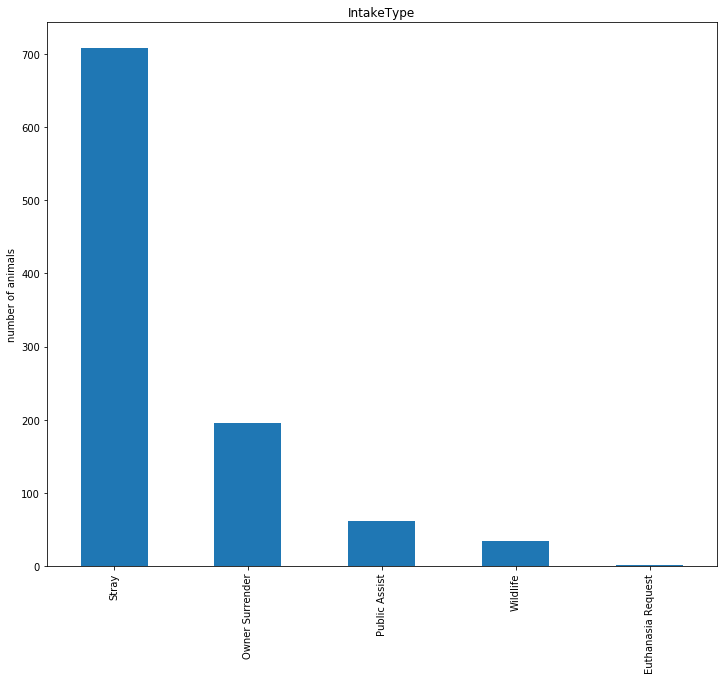

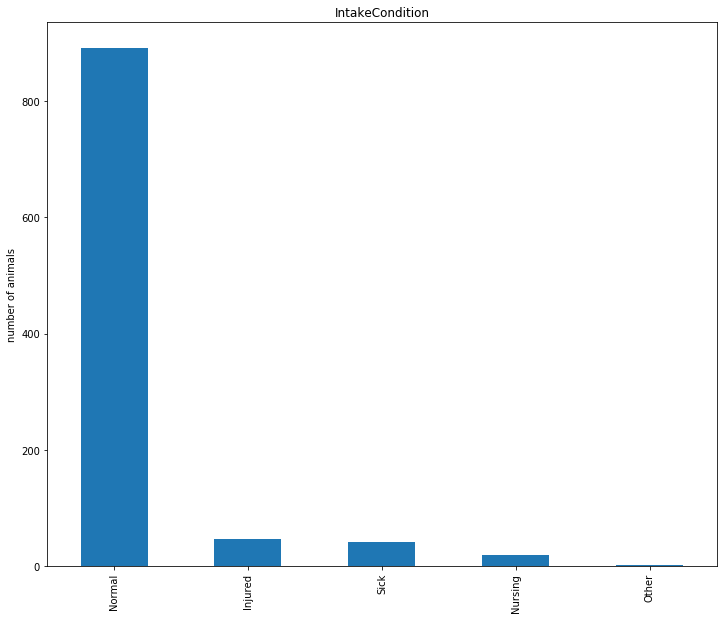

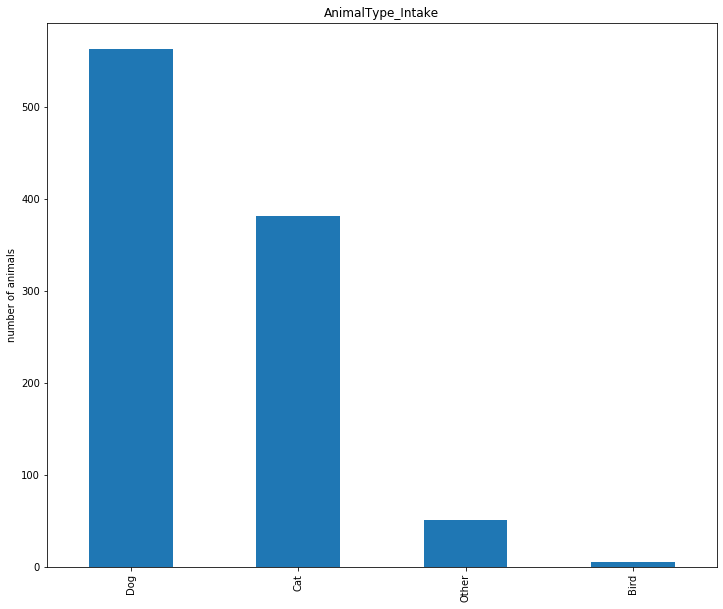

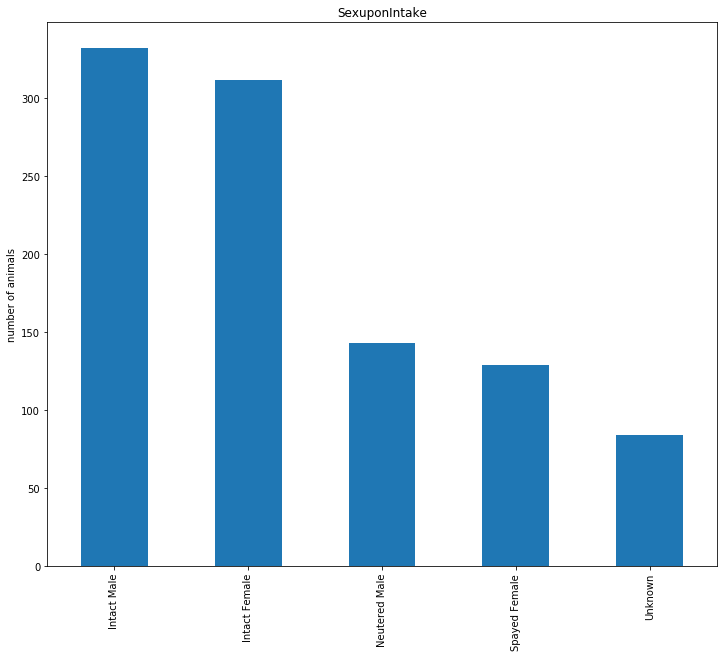

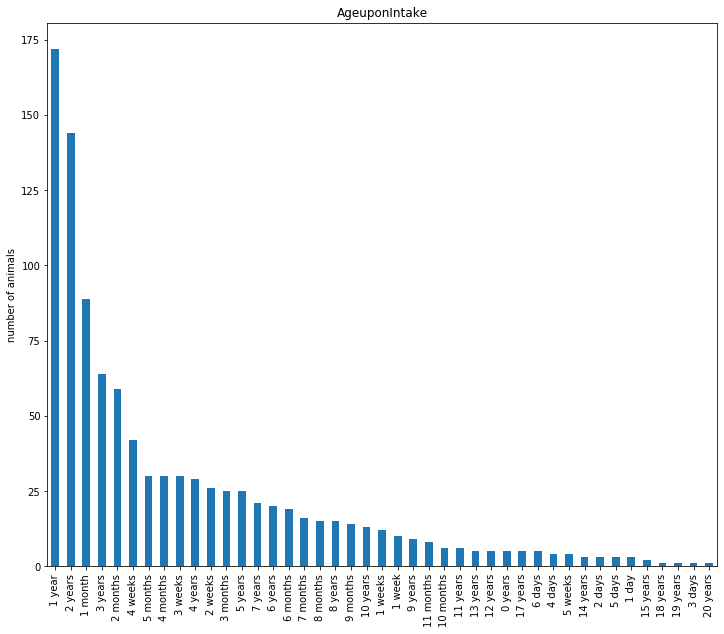

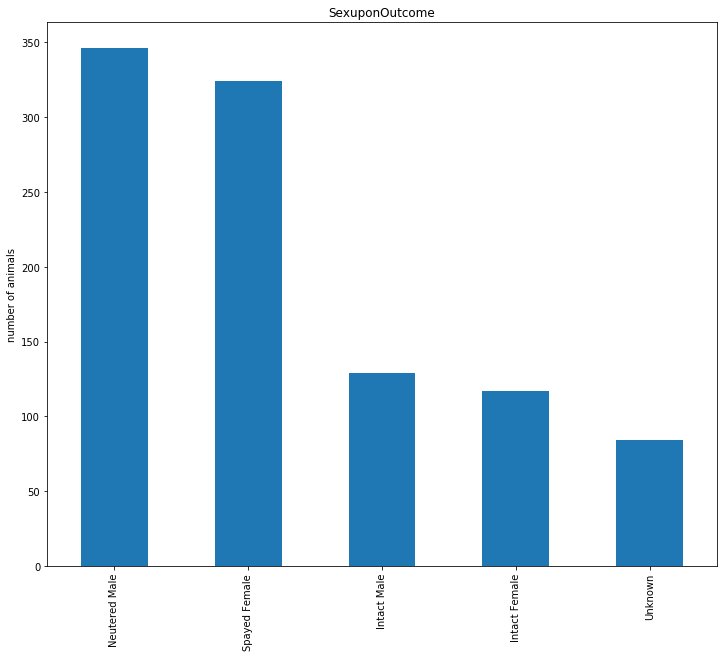

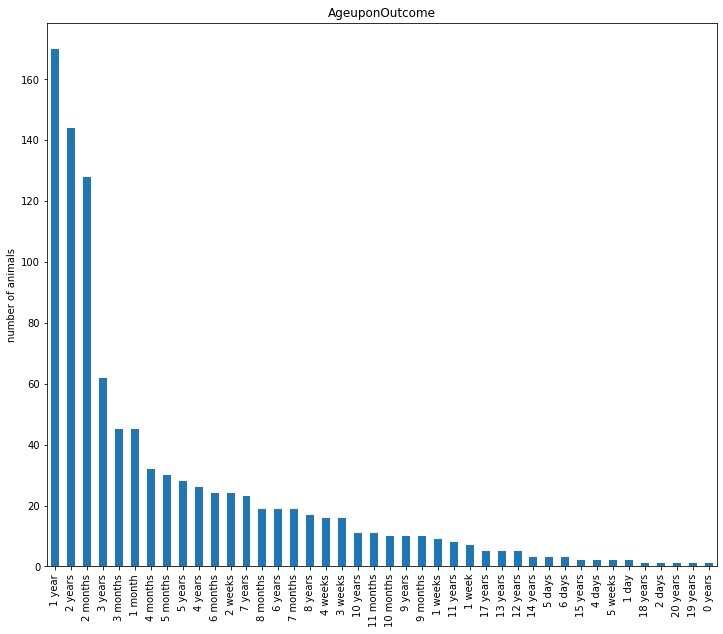

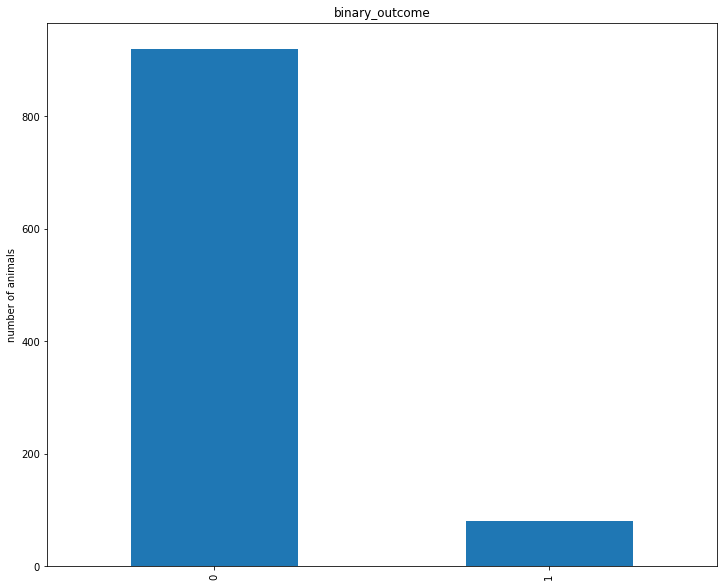

In [50]:

# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('AnimalWelfare_19205514_categorical_lowcardinality_barcharts.pdf')

#plot bar plots for all features
#dropna=Flase allows us to view the missing values
for column in categorical_with_low_cardinality:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(12,10))
    plt.ylabel('number of animals')
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### Categorical features with high cardinality

We will now plot each of the high cardinality features separately. Based on the frequencies returned above when testing for irregular cardinalities and permitted values, we have decided a suitable number of values to include in the plots. At this stage in the assignment, these plots are to give an idea of the representation of the values in these features and to highlight the issue of the high cardinality which will be addressed in the Data Quality Plan.

#### Name_Intake: 
The top 18 most frequent names will be plotted. 

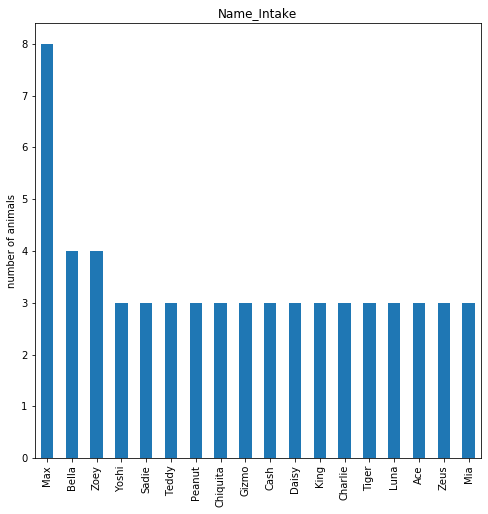

In [51]:
#plot top 18 most frequent as this makes sense based on the data above
name_most_frequent_plot = df['Name_Intake'].value_counts()[:18].sort_values(ascending=False)
name_most_frequent_plot.plot(kind='bar', title = "Name_Intake", figsize=(8,8))
plt.ylabel('number of animals')
#save to pdf
plt.savefig('categorical_high_cardinality_NameIntake.pdf')

#### Found Location: 

The top 14 most freuqent locations will be plotted. 

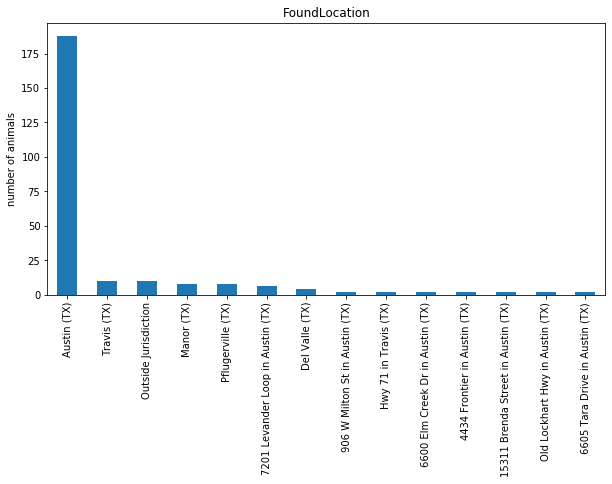

In [52]:
#plot 14 most frequent as this makes sense based on the data above.
location_most_frequent_plot = df['FoundLocation'].value_counts()[:14].sort_values(ascending=False)
location_most_frequent_plot.plot(kind='bar', title="FoundLocation", figsize=(10,5))
plt.ylabel('number of animals')
#save to pdf
plt.savefig('categorical_highcardinality_FoundLocation.pdf')

#### Breed Intake: 
The top 15 most frequent values will be plotted. 

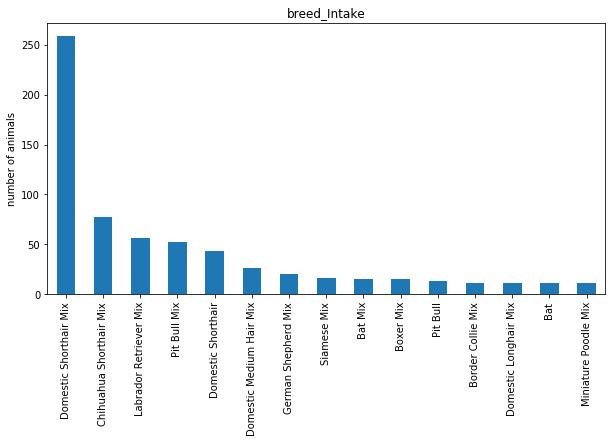

In [53]:
#plot top 15 most frequent as this makes sense based on the data above
breed_most_frequent_plot = df['Breed_Intake'].value_counts()[:15].sort_values(ascending=False)
breed_most_frequent_plot.plot(kind='bar', title="breed_Intake", figsize=(10,5))
plt.ylabel('number of animals')
#save to pdf
plt.savefig('categorical_highcardinality_Breed_Intake.pdf')

#### Color Intake: 
The top 13 most frequent values will be plotted. 

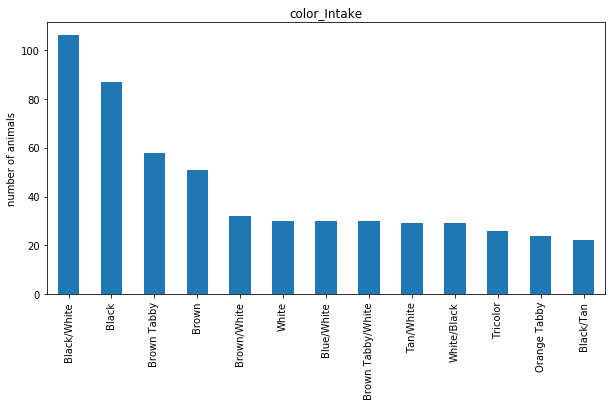

In [54]:
#plot top 13 most frequent as this makes sense based on the data above
color_most_frequent_plot = df['Color_Intake'].value_counts()[:13].sort_values(ascending=False)
color_most_frequent_plot.plot(kind='bar', title="color_Intake", figsize=(10,5))
plt.ylabel('number of animals')
#save to pdf
plt.savefig('categorical_high_cardinality_Color_Intake.pdf')

#### Running Assesment: 
 - **Cardinalities:** As already noted, the high cardinalities of some features are an issue. It is difficult to extract meaningful information from these cardinalities and they and may present problems for machine learning algorithms. 
 - **Missing Values:** There are 306 missing values in the *Name_Intake* feature.
 - **Ambiguous values:** *Intake_Condition* and *AnimalType_Intake* have ambiguous values *Other*.
 
### Initial Findings: 

Inital findings and detailed discussion for each feature can be found in the accompanying Data_Quality_Report.pdf file

# (2) - Prepare a Data Quality Plan for the cleaned csv file. 

The initial list of issues as identified in the **Data_Quality_Report.pdf**:

- 16 instances have failed logical integrity tests. 
- *Name_Intake* is missing 30.6% of values and has a high cardinality. 
- *Found_location* has an unusually high cardinality and inconsistent value format.
- *AnimalType_Intake* has an ambiguous value "Other".
- *Intake_Condition* has an ambiguous value "Other".
- *AgeuponIntake* and *AgeuponOutcome* are not in a useful format.
- *Breed_Intake* has an irregular cardinality.
- *Color_Intake* has an irregular cardinality.

### Solutions to deal with the issues identified

1. **Failed logical integrity tests.**
All logical integrity test results should be investigated further to see if the data makes sense. It is recommended that values are corrected if it makes sense to do so. If not, these instances shall be dropped. 
2. **Missing name values**
30.6% of names are missing. Imputing the values to the mode would change the central tendency too much. The percentage missing values is not high enough to immediately drop. Investigate the missing values further. If it makes sense to do so change all names to 'Yes' and all missing values to 'No'. This feature will then represent whether a name was provided or not.  
3. **Found location**
This feature should be split into two new features representing street and city. It is recommended that *FoundLocation* is replaced with the new city feature and that only the city is used for further analysis.
4. **AnimalType_Intake**
This feature has a value *Other* which is not providing much useful information. It should be investigated further and divided into more informative values if it makes sense to do so with the data. If not, this should be left as it is.
5. **Intake Condition**
This feature has a value *Other* which is not providing much useful information. It should be investigated further and imputed to a different value if it makes sense to do so based on the data. If not, this issue should be left as it is. 
6. **Format of age features**
It is recommended that these features are transformed into days. Age should be measured in days rather than years to maintain accurracy. 
7. **Breed_Intake irregular cardinality**
It is recommended that all values are divided into two values - 'Mixed Breed' and 'Pure Breed'. 
8. **Color Intake irregular cardinality**
It is recommended that values are split into two values which will represent 'light' and 'dark' colours.


### Apply solutions to obtain a new csv file.

1. **Failed logical integrity tests.**
All logical integrity test results should be investigated further to see if the data makes sense. If the data does not make sense, it is recommended that values are changed if it makes sense to do so. If not, these instances shall be dropped. 

 - **Test 1:** Check if the *'DateTime_Outcome'* is an earlier date than the *'DateTime_Intake'* for any of the animals. This would imply that the animal stayed a negative length of time in the shelter which is impossible.
- We saw that in part 1 that 7 instances failed this test. 
- We will now investigate this result further by analysing the dates alongside the date of birth, age of intake and age of outcome to see if the data makes sense. 

In [55]:
#create a dataframe containing intstances which have date of outcome before date of intake
test1_df = df[df['DateTime_Outcome'] < df['DateTime_Intake']]
#show the relevant columns in this new dataframe
test1_df[['DateTime_Outcome','DateTime_Intake','DateofBirth','AgeuponIntake','AgeuponOutcome']]

,DateTime_Outcome,DateTime_Intake,DateofBirth,AgeuponIntake,AgeuponOutcome
150,2019-06-30 18:17:00,2019-07-01 16:20:00,2013-06-09,6 years,6 years
193,2016-09-21 12:28:00,2016-10-09 14:42:00,2015-09-03,1 year,1 year
286,2018-11-13 18:47:00,2018-12-09 11:36:00,2015-09-30,3 years,3 years
354,2018-09-09 17:08:00,2019-11-29 14:47:00,2016-06-07,3 years,2 years
443,2018-07-15 17:13:00,2018-10-13 12:30:00,2017-11-15,10 months,7 months
627,2019-07-03 18:36:00,2019-09-05 13:38:00,2016-04-18,3 years,3 years
929,2013-11-30 17:07:00,2015-02-04 17:54:00,2013-06-20,1 year,5 months


We can see that the three features that failed test 5 are a subset of the features which fail test 1. The features which fail test 5 have an age of outcome which is less than the age of intake. We can see that there is a mix up in the dates and ages for these instances and as a result both tests will be investigated together. 

From analysing the data above it seems that the *DateTime_Intake* and *DateTime_Outcome* are switched. This is quite clear for indexes 354, 443 and 929 which are also the failing instances for test 5. Taking into account the inaccuracy of the ages provided in the dataset, we can see that the difference between the date of intake and date of outcome is appromxiately equal to the difference between their ages.

It makes sense however, that the dates are also switched for the other four instances. This is because their length of stay in the shelter is short relative to the format of their age. As the ages in the dataset are an approximation, not enough time has passed for the ages to change while in the shelter. 

Thus we can safely assume that the *DateTime_Intake* and *DateTime_Outcome* are switched for these instaces. We can also assume that the *AgeuponIntake* and *AgeuponOutcome* are switched. We will now revert these switches below.

In [56]:
#rename each column with the name of the feature it is supposed to represent
test1_df = test1_df.rename(columns = {'DateTime_Outcome':'DateTime_Intake', 'DateTime_Intake':'DateTime_Outcome', 'AgeuponIntake':'AgeuponOutcome', 'AgeuponOutcome':'AgeuponIntake'})

In the cell below we update the dataframe based with the new values from the test1_df. The renamed columns will merge with the columns of the same name in our df.

In [57]:
#update our dataframe
df.update(test1_df)

In the cell below we will now run the test again to ensure that the invalid instances have been corrected. We expect that 0 rows will fail the test. 

In [58]:
#run test 1 again
test_1 = df[['DateTime_Outcome','DateTime_Intake']][df['DateTime_Outcome'] < df['DateTime_Intake']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(7)

Number of rows failing the test:  0


,DateTime_Outcome,DateTime_Intake


 - **Test 3:** Check if age of intake of any animal is zero. This is indeed plausible if an animal is born in the shelter. However, this will be tested to ensure there are not an unexpected number of animals aged zero as this may imply some invalid data. 

We saw that 5 instances failed this integrity test and had an age of entry of 0. In order to investigate further, the *DateofBirth* and *SexuponIntake* will be analysed for the failing instances. This will tell us if the data makes sense. 

In [59]:
#view the sexuponIntake and date of birth for the failing instances
age_intake_zero_check = (df['DateTime_Intake'] - df['DateofBirth']).dt.days
test_3 = df[age_intake_zero_check == 0]
test_3[['SexuponIntake', 'DateTime_Intake','DateofBirth']]

,SexuponIntake,DateTime_Intake,DateofBirth
180,Unknown,2019-02-21 14:46:00,2019-02-21
497,Intact Female,2016-12-11 11:37:00,2016-12-11
668,Intact Male,2017-07-30 11:50:00,2017-07-30
811,Intact Female,2017-06-19 14:04:00,2017-06-19
842,Intact Male,2016-05-11 12:50:00,2016-05-11


We can see in the table above that for all animals which have an age of intake of zero, the date of intake is the same as the date of birth. From this I take that these animals were born in the shelter. Furthermore, all of these instances are either an unknown sex or intact. As a newborn could not yet be spayed or neutered, this strengthens the case that they were born on this day. These instances will be left as is. 

 - **Test 4:** Check if age of outcome of any animal is zero. This would imply that an animal left  the shelter on the day of their birth.

We saw above that one instance failed this logical integrity test. We will now investigate this result further by analysing the date of intake, date of outcome and binary outcome of this instance. 

In [60]:
#create a dataframe containing the instances where age of outcome is zero
#I subtract date of birth from date of intake and convert this value to days
age_outcome_zero_check = (df['DateTime_Outcome'] - df['DateofBirth']).dt.days
test_4 = df[age_outcome_zero_check == 0]
test_4[['DateTime_Intake','DateTime_Outcome','DateofBirth', 'binary_outcome']]

,DateTime_Intake,DateTime_Outcome,DateofBirth,binary_outcome
668,2017-07-30 11:50:00,2017-07-30 16:51:00,2017-07-30,0


We can see that the animal seems to have left the shelter a few hours after entering. Furthermore the *binary_outcome* value of 0 tells us that the animal had a positive outcome and was either adopted or returned to their owner. It is assumed that an animal would not be adopted a few hours after being born. It must be assumed that the animal was returned to its owner after being born. This would be plausible if both the animal and its mother were in the shelter and both were returned to their owner together. Ideally we would need to speak to the domain expert to gain more information about whether this is invalid data. This instance will be left as it is. 

 - **Test 5:** Check if age of outcome is less than age of intake for any animal. This would imply that the animal decreased in age in the shelter which is impossible. We saw that 3 instances had an age of outcome less than the age of intake. 
 
As dicussed in test 1, these instaces were a subset of test 1 and the issue has already been addressed. We will now run test 5 again to ensure that there are no failing instances. 

In [61]:
#run test 5 again
negative_age_difference_check = (transform_age_feature(df['AgeuponOutcome'])-transform_age_feature(df['AgeuponIntake']))
test_5 = df[negative_age_difference_check <0]
#print out the number of rows failing the test
print("Number of rows failing the test: ", test_5.shape[0])
test_5.head(7)

Number of rows failing the test:  0


,AnimalID,Name_Intake,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome


**2. Missing Name values**
30.6% of the values for the *'Name_Intake'* feature are missing. This figure is too low to immediately drop the feature. However, this value is too high to impute the values to the mode which is 'Max'. I shall now investigate if there is any relationship between the missing name values, intake type, intake condition and binary outcome. 

In [62]:
#view the top 20 features with missing name values
missing_name_investigation_df = df.loc[df['Name_Intake'].isnull()]
#print out the following relevant columns
missing_name_investigation_df[['Name_Intake', 'IntakeType', 'IntakeCondition', 'binary_outcome']].head(20)

,Name_Intake,IntakeType,IntakeCondition,binary_outcome
1,NaN,Stray,Other,0
11,NaN,Stray,Normal,0
15,NaN,Stray,Normal,0
16,NaN,Stray,Normal,0
17,NaN,Wildlife,Normal,1
26,NaN,Stray,Normal,0
29,NaN,Stray,Normal,1
30,NaN,Stray,Normal,0
34,NaN,Wildlife,Normal,1
38,NaN,Stray,Nursing,0


 - We can see that in the cases where the animal has no name, the animal is either a stray of wildlife. This makes sense. We can see that there is no clear link between the condition and the lack of name, nor is there any pattern of outcome with the lack of name. It is assumed therefore, that the missing name values make sense and are not due to invalid data. 

 - The figure 30.6% is too low to impute. If the values were imputed to the mode 'Max', the central tendancy would be skewed.
 
 - It is possible that the name of an animal has an impact on its outcome. That is, animals with names might be more likely to be adopted than animals with no names. For this reason, this feature shall not be dropped yet. However, as the cardinality is currently too high, we will replace all names with 'Yes' and all missing values with 'No'. This will allow us to investigate whether having a name or not affects the binary outcome. 

In [63]:
#replace missing values with 'No'
df['Name_Intake'].fillna('No', inplace=True)

In [64]:
#if the value is not 'No', change it to 'Yes'
df['Name_Intake'][df.Name_Intake.str.contains('No')==0] = 'Yes'

In [65]:
#check that there are two values - Yes and No
df['Name_Intake'].unique()

array(['Yes', 'No'], dtype=object)

We can see that this feature now has two values. We now change the name of the feature to something more suitable.  

In [66]:
#rename the Name_Intake column
df = df.rename(columns = {'Name_Intake':'Name_Provided'})

**3. Found_location has an unusually high cardinality of 766.**

The found location has high cardinality of 766 and has inconsistent values. For example, the most frequent value is *'Austin (TX)'* and the majority of other values within the top 20 most frequent are streets in Austin such as *'7201 Levander Loop in Austin (TX)'*. These representations are inconsistent.

A new dataframe shall be created in which this feature will be split into two new features - found street and found city. *FoundLocation* will be set equal to *FoundCity* in the new dataframe. In the cases where a street address is given, it is always in the format above with 'in' before the city name. As a result, the values shall be split with 'in' as the delimeter. 

In [67]:
#create new dataframe in which we will split the feature
found_location_df = pd.DataFrame(
    columns=["FoundStreet","FoundCity"])

In [68]:
#create two new features for street and city
found_location_df[['FoundStreet','FoundCity']] = df['FoundLocation'].str.split(" in ",expand=True)

In [69]:
#look at the unqiue values for new feature 'FoundCity'
found_location_df['FoundCity'].unique()

array(['Austin (TX)', 'Travis (TX)', None, 'Pflugerville (TX)',
       'Webberville (TX)', 'Manor (TX)', 'Del Valle (TX)',
       'Creedmoor (TX)', 'Leander (TX)', 'Cedar Park (TX)',
       'Lakeway (TX)', 'Williamson (TX)', 'Lago Vista (TX)'], dtype=object)

As we can see, a value within the new feature *'FoundCity'* is *'None'*. This is due to cases where no street name was given, so there was no 'in' to delimit the value at. To fix this in the cell below I fill in any empty values with the value from 'FoundStreet'.

In [70]:
# replace empty values with the value in 'FoundStreet' feature
found_location_df['FoundCity'].fillna(found_location_df['FoundStreet'], inplace=True)

In [71]:
#set foundlocation equal to found city
df['FoundLocation']=found_location_df['FoundCity']

The values above are the values that will be used in place of the 'FoundLocation' from now on. Below I will plot a barchart of these results, in order to compare to the barplot created in part 1 of this assignment, prior to fixing this issue. 

Text(0, 0.5, 'number of animals')

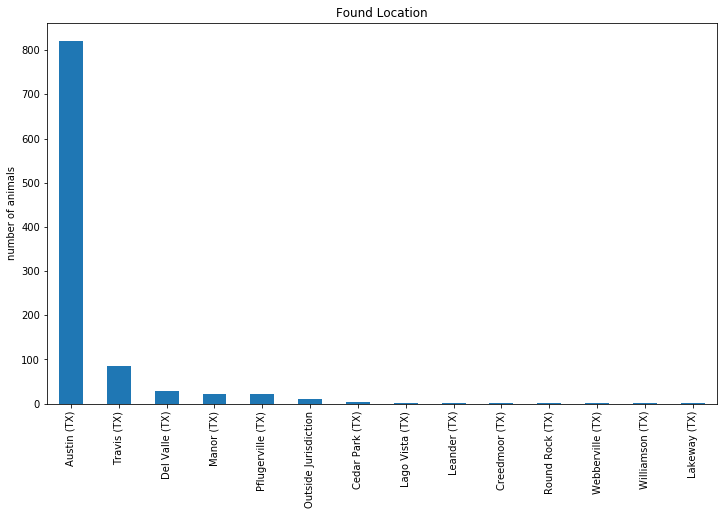

In [72]:
#plot found location
location = df['FoundLocation'].value_counts().sort_values(ascending=False)
location.plot(kind='bar', title="Found Location", figsize=(12,7))
plt.ylabel('number of animals')

We can see from the above graph that the vast majority of animals are found in Austin. Another possible solution would have been to create two values based on whether the animal was found in Austin or not. However, the approach we have implemented gives a more detailed and accurate representation of the data. 

4. **Animal Type Intake**
This feature has a value *Other* which is not providing much useful information. It should be investigated further and divided into more informative values if appropriate. 

We begin by visualising all of the instances which have a value *Other* for the feature *AnimalType_Intake*.

In [73]:
#view all instances with value 'other'
df[df['AnimalType_Intake'] == 'Other']

,AnimalID,Name_Provided,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
17,A702088,No,2015-05-09 10:54:00,Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Raccoon,Gray/Black,2015-05-09 11:06:00,2014-05-09,Unknown,1 year,1
29,A768987,No,2018-03-28 16:09:00,Austin (TX),Stray,Normal,Other,Unknown,2 years,Rabbit Sh Mix,White/Black,2018-04-16 18:29:00,2016-03-28,Unknown,2 years,1
34,A732284,No,2016-08-05 13:07:00,Austin (TX),Wildlife,Normal,Other,Unknown,1 year,Bat,Black/Brown,2016-08-05 13:15:00,2015-08-05,Unknown,1 year,1
52,A783039,No,2018-10-24 15:07:00,Austin (TX),Wildlife,Sick,Other,Unknown,2 years,Bat Mix,Black,2018-10-24 15:29:00,2016-10-24,Unknown,2 years,1
71,A793716,No,2019-04-28 23:23:00,Austin (TX),Public Assist,Normal,Other,Unknown,1 year,Bat Mix,Brown,2019-04-29 08:55:00,2018-04-28,Unknown,1 year,1
79,A669526,No,2013-12-21 19:11:00,Travis (TX),Wildlife,Normal,Other,Unknown,1 year,Bat Mix,Brown,2013-12-22 09:20:00,2012-12-21,Unknown,1 year,1
95,A679254,No,2014-05-18 09:48:00,Austin (TX),Wildlife,Sick,Other,Unknown,1 year,Bat Mix,Brown,2014-05-18 10:38:00,2013-05-18,Unknown,1 year,1
101,A789835,No,2019-02-28 13:44:00,Austin (TX),Stray,Normal,Other,Neutered Male,1 year,Ferret Mix,Tan,2019-03-04 12:06:00,2018-02-28,Neutered Male,1 year,0
113,A703428,Yes,2015-05-24 15:53:00,Del Valle (TX),Stray,Normal,Other,Unknown,1 year,Rabbit Sh Mix,Brown,2015-06-07 11:06:00,2014-05-24,Unknown,1 year,0
122,A683379,No,2014-07-09 16:12:00,Austin (TX),Stray,Normal,Other,Unknown,1 year,Hamster Mix,Gray/White,2014-07-11 11:10:00,2013-07-09,Unknown,1 year,0


We can see that there is a pattern in the feature *Breed_Intake* for these instances. To investigate further, we now look at the top 20 most frequent breeds within the group of instances with *AnimalType_Intake* as *Other*.

In [74]:
#view frequency of breed for the instances with AnimalType_Intake other
df[df["AnimalType_Intake"] == "Other"].Breed_Intake.value_counts()[:20]

Bat Mix            15
Bat                11
Rabbit Sh Mix       4
Raccoon Mix         4
Raccoon             3
Guinea Pig          2
Skunk Mix           2
Opossum             2
Cold Water          1
Opossum Mix         1
Californian Mix     1
Hamster Mix         1
Snake               1
Ferret Mix          1
Lop-Holland         1
Guinea Pig Mix      1
Name: Breed_Intake, dtype: int64

We can see that two most frequent values for *Breed_Intake* are *Bat* and *Bat Mix*. We therefore conclude that an additonal value should be added to this feature called *Bat* which will account for this large proportion of the *Other* type.

In the cell below we create a new dataframe containing all instances with the string "Bat" in the *Breed_Intake* feature. We then set the feature *AnimalType_Intake* to "Bat" for all of these instances. Finally we update our dataframe with this new information. 

In [75]:
#create a new dataframe containing all instances containing "Bat" as the value for "Breed Intake"
create_bat_value_df = df[df['Breed_Intake'].str.contains("Bat")]
#set the feature AnimalType_Intake to "Bat"
create_bat_value_df['AnimalType_Intake']='Bat'
#update our dataframe with this new information
df.update(create_bat_value_df)

In the cell below we view the unique values for the feature *AnimalType_Intake* to make sure that the new value "Bat" has been created.

In [76]:
#view the unique values for this feature
df['AnimalType_Intake'].unique()

array(['Cat', 'Dog', 'Other', 'Bat', 'Bird'], dtype=object)

We can see that 'Bat' has now be added as a value to this feature. We note here that the creation of the above dataframe has reverted our 'category' datatypes back to objects. We now convert them back to their appropriate types below. 

In [77]:
#convert all objects to categories
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

#convert animal ID to an object type
df['AnimalID'] = df['AnimalID'].astype('object')  

In [78]:
df.dtypes

AnimalID                     object
Name_Provided              category
DateTime_Intake      datetime64[ns]
FoundLocation              category
IntakeType                 category
IntakeCondition            category
AnimalType_Intake          category
SexuponIntake              category
AgeuponIntake              category
Breed_Intake               category
Color_Intake               category
DateTime_Outcome     datetime64[ns]
DateofBirth          datetime64[ns]
SexuponOutcome             category
AgeuponOutcome             category
binary_outcome             category
dtype: object

**5. Intake Condition**
This feature has a value *Other* which is not providing much useful information. It should be investigated further.

We will begin by investigating the frequency of each of the values within this feature. 

In [79]:
#view frequencies of values for this features
df['IntakeCondition'].value_counts().sort_values(ascending=False)

Normal     891
Injured     47
Sick        42
Nursing     19
Other        1
Name: IntakeCondition, dtype: int64

We can see that the most frequent value is 891 and that there is only 1 feature with a value of *Other*. We will now look further into this instance.

In [80]:
#view the instance with value Other
intake_condition_value_other = df[df['IntakeCondition'] == 'Other']
intake_condition_value_other

,AnimalID,Name_Provided,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
1,A685139,No,2014-08-03 11:23:00,Austin (TX),Stray,Other,Dog,Intact Female,3 months,Cavalier Span Mix,White/Black,2014-08-07 18:09:00,2014-05-03,Spayed Female,3 months,0


We can see that the animal is a Dog who entered the shelter at three months of age and left with a positive outcome. Based on this outcome and on the frequency of the mode *Normal*, it will be assumed that this is an invalid value and that the animal was of normal health. Ideally I would like to speak to a domain expert to understand this condition type further. However, without further information it is recommended that this value be replaced with *Normal*.

In [81]:
#replace the value other with normal
df['IntakeCondition'] = df.IntakeCondition.str.replace(r'(^.*Other.*$)', 'Normal')

In [82]:
#view frequencies again to make sure other has been removed
#the frequency of normal will have increased by one
df['IntakeCondition'].value_counts().sort_values(ascending=False)

Normal     892
Injured     47
Sick        42
Nursing     19
Name: IntakeCondition, dtype: int64

We can see that there is now no 'Other' Value.

We now convert IntakeCondition back to a category type. 

In [83]:
#convert Breed_Intake back to a category type
df['IntakeCondition'] = df['IntakeCondition'].astype('category')

**6. Format of age features**
- *AgeuponIntake* and *AgeuponOutcome* are not in a useful format. they are currently represented as a number and a word, such as *'1 year'*, for example. These features will be transformed into a value representing the age in days.
- One possible solution is to convert the given age features. However, we saw above when investigating the failed logical integrity tests that the age features provided with the dataset are approximations. As a result, we will subtract *DateofBirth* from *DateTime_Intake* to generate an age of intake in days. We will then subtract *DateofBirth* from *DateTime_Outcome* to generate an age of outcome in days. This will be more accurate than using *AgeuponIntake* and *AgeuponOutcome*.

In [84]:
#create a new dataframe
convert_age_to_days_df = pd.DataFrame(
     columns=['AgeIntake_days','AgeOutcome_days'])

In [85]:
#generate new age of intake
convert_age_to_days_df['AgeIntake_days']=(df['DateTime_Intake'] - df['DateofBirth']).dt.days
#replace AgeuponIntake feature with this new age
df['AgeuponIntake']=convert_age_to_days_df['AgeIntake_days']

In [86]:
#generate new age of outcome
convert_age_to_days_df['AgeOutcome_days']=(df['DateTime_Outcome'] - df['DateofBirth']).dt.days
#replace AgeuponIntake feature with this new age
df['AgeuponOutcome']=convert_age_to_days_df['AgeOutcome_days']

**Descriptive statistics for age features**

As we did not have these continous age features earlier in the assignment, we will now compute summary statsitics for these new features.


In [87]:
#create table of summary statsitics for the new age features.
transformed_age_features = ['AgeuponIntake','AgeuponOutcome']
df[transformed_age_features].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,759.812,1116.589203,0.0,68.00,365.0,765.25,7305.0
AgeuponOutcome,1000.0,781.955,1124.826147,0.0,86.75,367.0,808.25,7306.0


In the cell below we further anaylse these new features to by investigating the range of values and the most frequent values. 

In [88]:
#loop through list of transformed age features
for feature in transformed_age_features:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

AgeuponIntake
----------

Range AgeuponIntake is:  7305
----------
Value  Number of Instances
365     101
730      72
731      39
366      26
61       25
1096     24
22       22
1095     19
31       18
15       17
30       16
92       15
76       14
1461     13
45       13
Name: AgeuponIntake, dtype: int64 



AgeuponOutcome
----------

Range AgeuponOutcome is:  7306
----------
Value  Number of Instances
366    22
731    17
369    16
15     15
367    12
22     11
734    10
365    10
730    10
61      9
371     9
65      9
736     9
68      9
735     9
Name: AgeuponOutcome, dtype: int64 





We can see that our initial observations of the *AgeuponIntake* and *AgeuponOutcome* are confirmed now that we have converted these features into continuous type. We can see that the min is 0. This is explained by the animals which are age 0 on the date they enter the shelter. We can see that the median is 365 days. This makes sense considering most of the ages of animals will be approximated by the staff in the shelter. It makes sense that most are approximated to '1 year'. The max is 7300 days which is roughly 20 years. There is a large gap between this value and the third quartile and this value could be seen as an outlier. We will now visualise this further in some graphs.

**Histograms**

We will now create histograms for *'AgeIntake'* and *'AgeOutcome'*.

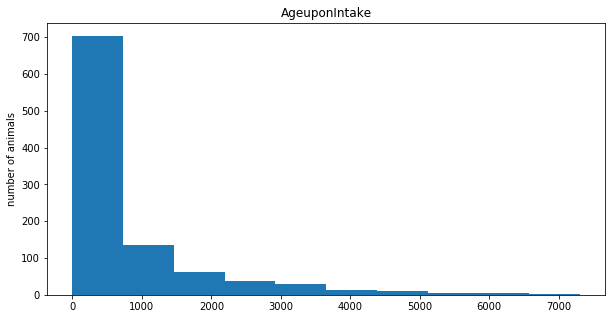

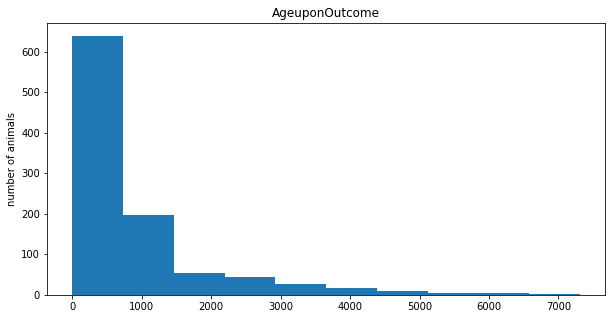

In [89]:
#loop through list of transformed ages
transformed_age_features = ['AgeuponIntake','AgeuponOutcome']
for col in transformed_age_features:
        f = df[col].plot(kind='hist', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of animals')
        plt.show()    

We can see in the histograms that both *AgeuponIntake* and *AgeuponOutcome* are exponential. This shows us that most of the animals are under 1000 days old while very few are at older ages of 7000 days.

**Box Plots**

We will now create box plots for the two new age features. This will help us to further visualise any potential outliers.

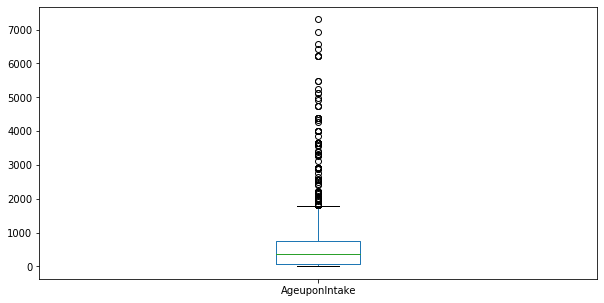

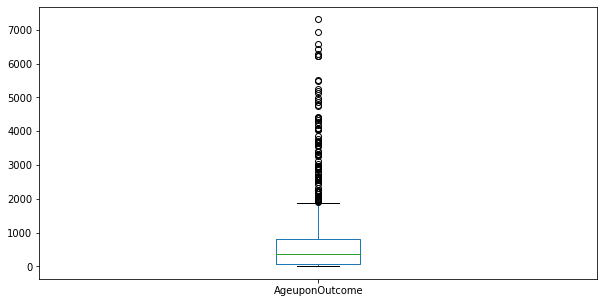

In [90]:
# Plot box plots for the new continuous features
for col in transformed_age_features:
    f = df[col].plot(kind='box', figsize=(10,5))
    plt.show() 

We can see that there are many instances above the max value of the box plot. However, considering the environment of the animal shelter these outliers make sense. It makes sense that the majority of animals are younger and that much a smaller number will be of an older age.

Based on the box plots above, we will now look at a sample of ten of the animals who have an age above 1500 days. 

In [91]:
#view 10 of the instances with ag age over 1500 days
df[df['AgeuponIntake'] > 1500].head(10)

,AnimalID,Name_Provided,DateTime_Intake,FoundLocation,IntakeType,IntakeCondition,AnimalType_Intake,SexuponIntake,AgeuponIntake,Breed_Intake,Color_Intake,DateTime_Outcome,DateofBirth,SexuponOutcome,AgeuponOutcome,binary_outcome
6,A623526,Yes,2019-11-15 13:25:00,Travis (TX),Owner Surrender,Normal,Dog,Spayed Female,2874,Rottweiler/Labrador Retriever,Black/Tan,2019-11-27 11:52:00,2012-01-02,Spayed Female,2886,0
7,A684122,Yes,2014-07-19 16:45:00,Austin (TX),Stray,Normal,Dog,Neutered Male,4383,Standard Schnauzer Mix,Gray,2014-07-20 13:38:00,2002-07-19,Neutered Male,4384,0
9,A658088,Yes,2016-05-19 18:17:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,1565,Australian Shepherd Mix,Tricolor,2016-05-25 16:11:00,2012-02-05,Spayed Female,1571,0
21,A710320,Yes,2015-08-21 14:33:00,Austin (TX),Public Assist,Normal,Dog,Spayed Female,2038,Pit Bull Mix,Blue/White,2015-09-01 16:36:00,2010-01-21,Spayed Female,2049,0
35,A688065,Yes,2014-09-14 11:15:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,1826,Domestic Medium Hair Mix,Black/White,2014-11-07 13:35:00,2009-09-14,Neutered Male,1880,0
40,A518937,Yes,2015-11-12 11:21:00,Austin (TX),Stray,Normal,Dog,Spayed Female,3380,Labrador Retriever Mix,Chocolate,2015-11-17 13:30:00,2006-08-11,Spayed Female,3385,0
56,A662171,Yes,2017-12-23 10:21:00,Pflugerville (TX),Stray,Normal,Dog,Spayed Female,2151,Siberian Husky Mix,Black/White,2017-12-24 13:27:00,2012-02-02,Spayed Female,2152,0
57,A595670,Yes,2018-10-12 17:29:00,Austin (TX),Stray,Normal,Dog,Neutered Male,3856,Jack Russell Terrier,White/Tricolor,2018-10-12 18:36:00,2008-03-22,Neutered Male,3856,0
72,A619664,Yes,2015-08-05 11:34:00,Austin (TX),Stray,Normal,Dog,Spayed Female,5477,Chihuahua Shorthair Mix,White/Tan,2015-08-11 18:17:00,2000-08-06,Spayed Female,5483,0
73,A738623,Yes,2016-11-18 14:38:00,Travis (TX),Stray,Normal,Dog,Spayed Female,3653,Australian Cattle Dog Mix,Black/Brown,2017-03-09 13:50:00,2006-11-18,Spayed Female,3764,0


We can see that the data makes sense. In this sample the animals are all dogs or cats and are all neutered/spayed. It is expected that dogs and cats of this age would be in the animal shelter. These outliers will be left as they are. 

7. **Breed_Intake has a high cardinality and contains overlapping values.**

This feature has a cardinality of 211. We will now group these values into 'Mixed Breeds' and 'True Breeds'. This grouping is performed because it is assumed that mixed breeds will be adopted at a different rate than true breeds. 


Another possible solution to this issue would be to assume that the word 'Mix' is not relevant and to remove that from all values. However, that would not reduce the cardinality enough. Without consultation with a domain expert, we do not have enough information to make breed specific groupings. 

In [92]:
#use regex to replace any value containing the string 'Mix' with 'Mixed Breed'
df['Breed_Intake'] = df.Breed_Intake.str.replace(r'(^.*Mix.*$)', 'Mixed Breed')
 
#replace any string not containing the string 'Mix' with 'Pure Breed'
df['Breed_Intake'][df.Breed_Intake.str.contains('Mix')==0] = 'Pure Breed'

In [93]:
#check that the number of unique values has reduced to 2
df['Breed_Intake'].nunique()

2

In [94]:
#view the unique values
df['Breed_Intake'].unique()

array(['Mixed Breed', 'Pure Breed'], dtype=object)

We see that this feature now has two unique values. *Breed_Intake* will now have reverted to an object type. We now convert it back to a category type. 

In [95]:
#convert Breed_Intake back to a category type
df['Breed_Intake'] = df['Breed_Intake'].astype('category')

In the cell below we will now plot the grouped breed types. 

Text(0, 0.5, 'number of animals')

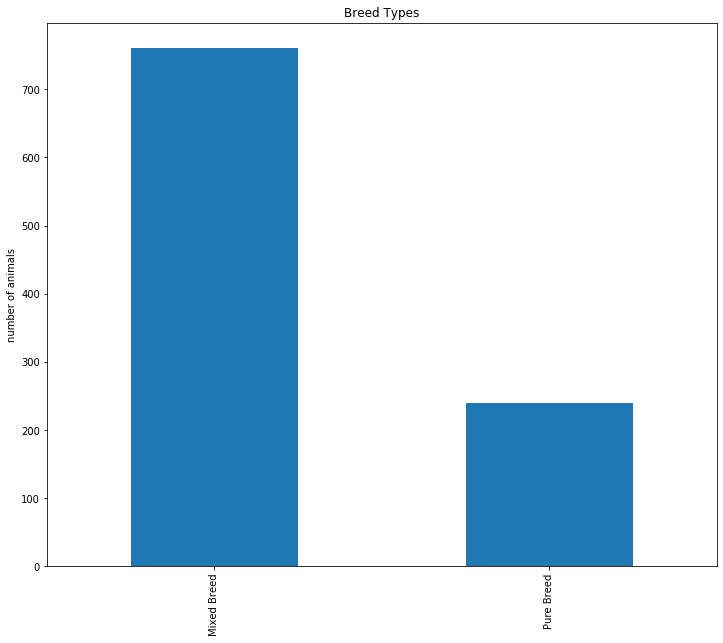

In [96]:
#plot the updated feature
grouped_breeds = df['Breed_Intake'].value_counts().sort_values(ascending=False)
grouped_breeds.plot(kind='bar', title="Breed Types", figsize=(12,10))
plt.ylabel('number of animals')

We can see that we have now transformed the *Breed_Intake* feature into one with only two values. We can see that there are far more mixed breed animals than pure breed.

8. **Colour_Intake has a high cardinality and contains overlapping values.**

We will now adrdress the issue of high cardinality in the *Color_Intake* feature. 

To overcome the high cardinality we will group the values based on whether the animal is dark or light coloured. The first step is to split the values at the delimeter "/". It is assumed that the color before the "/" is the dominant color. That is, we assume that a cat which is *'Black/White'* is majority black while a cat that is *'White/Black'* is majority white. Based on this assumption we then discard the second color after the "/" and group *'Black', 'Brown', 'Torbie', 'Tortie'* and *'Chocolate'* into the 'Dark' value. All other colors and coat patterns are grouped into 'Light'. Altough these colours might not be classified as 'light' colours, there is a clear distinction between them and the dark colours listed above.

Another possible solution would be to separate the colours from the breed-specific coat patterns. However, given the quantity of animal types and breeds, it would not be possible to implement this accurately. Furthermore, the cardinality of the colors would probably still be too high. 

In [97]:
#create a new dataframe in which we will split the color feature into two features
color_df = pd.DataFrame(columns=['firstcolor','secondcolor','Color_Intake'])

In [98]:
#split the Color_Intake feature at the delimeter "/"
color_df[['firstcolor','secondcolor']] = df['Color_Intake'].str.split("/",expand=True)

In the cell below we look at the unique values in the first column. These are the values we will use from now on.

In [99]:
#check the unique values
color_df['firstcolor'].unique()

array(['Torbie', 'White', 'Black', 'Tan', 'Gray', 'Brown Brindle',
       'Tricolor', 'Brown', 'Brown Tabby', 'Red', 'Blue', 'Orange Tabby',
       'Gray Tabby', 'Chocolate', 'Tortie', 'Black Tabby', 'Calico',
       'Blue Tabby', 'Cream', 'Yellow', 'Sable', 'Silver Tabby',
       'Flame Point', 'Orange', 'Lynx Point', 'Blue Point', 'Cream Tabby',
       'Silver', 'Blue Merle', 'Fawn', 'Buff', 'Brown Tiger',
       'Seal Point', 'Blue Tick', 'Gold', 'Red Tick', 'Calico Point',
       'Tortie Point', 'Lilac Point', 'Red Merle', 'Pink', 'Brown Merle'],
      dtype=object)

In [100]:
#if the string contains any of the colors listed, replace with 'Dark'
#otherwise replace with 'Light'
color_df['firstcolor'] = np.where(color_df['firstcolor'].str.contains('Black|Brown|Torbie|Tortie|Chocolate', regex=True), "Dark", "Light")

In [101]:
#check that the number of values has reduced to 2
color_df['firstcolor'].nunique()

2

We see that this feature now has only two values. In the cell below we assign the feature *'Color_Intake'* in our dataset to the feature *'firstcolor'*.

In [102]:
#set color_intake equal to the firstcolour
df['Color_Intake']=color_df['firstcolor']

*Breed_Intake* will now have reverted to an object type. We now convert it back to a category type. 

In [103]:
#convert Color_Intake back to a category type
df['Color_Intake'] = df['Color_Intake'].astype('category')

In the cell below we will now plot the grouped colors.

Text(0, 0.5, 'number of animals')

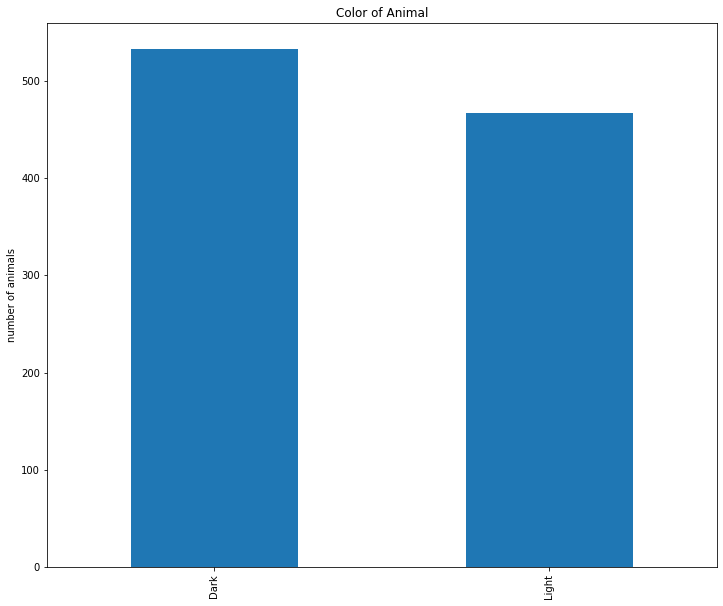

In [104]:
grouped_color = df['Color_Intake'].value_counts().sort_values(ascending=False)
grouped_color.plot(kind='bar', title="Color of Animal", figsize=(12,10))
plt.ylabel('number of animals')

We can see that the majority of animals fall within the *Dark* coloured group.

### Summary of data Quality plan

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|AnimalID (object)                          |   Unique identifier not to be used as feature in data preparation|Keep to be able to link example to actual animal, but do not use for data preparation|
Name_Intake (category)             |   Missing Values (30.6%)            | Change it so that it has two values - 'No' to represent a missing value and 'Yes' to show that a name was provided. |       
DateTime_Intake (datetime64[ns])       | Some dates failed logical integrity tests. | Revert switched features for failing instances.|
FoundLocation (category)             | High cardinality (766)   | Represent found location using only the city.| 
IntakeType (category)                 | None | Keep as is |   
IntakeCondition (category)                | Ambiguous value 'Other' | Impute to mode. |
AnimalType_Intake (category)    | Ambiguous value 'Other' | Further divide up this value by creating a "Bat" value. |
SexuponIntake (category)                  | None | Keep as is|
AgeuponIntake (category)                  | Not in a useful numeric format. Potential outliers | Convert into days. Leave potential outliers as they are. |
Breed_Intake (category)                 | High cardinality  (211) | Divide all values into 'Mixed Breed' and 'Pure Breed'  | 
Color_Intake (category)                 | High cardinality  (115) | Divide all values into 'Dark' and 'Light'|
DateTime_Outcome (datetime64[ns])             | Some dates failed logical integrity tests.  | Revert switched features for failing instances.|
DateofBirth (datetime64[ns])             | None | Keep as is |
SexuponOutcome (category)         | None | Keep as is|
AgeuponOutcome (category)                  | Not in a useful numeric format. Potential outliers | Convert into days. Leave potential outliers as they are. |
binary_outcome (category)         | None | Keep as is|

### Save the new CSV file with a self explanatory name. 

Next we will generate a table of summary statistics for our cleaned features and will then save the cleaned dataset to a csv file.

In [105]:
##create table of statistics for the categorical features
category_cols = df.select_dtypes(['category']).columns
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Name_Provided,1000,2,Yes,694
FoundLocation,1000,14,Austin (TX),820
IntakeType,1000,5,Stray,708
IntakeCondition,1000,4,Normal,892
AnimalType_Intake,1000,5,Dog,563
SexuponIntake,1000,5,Intact Male,332
Breed_Intake,1000,2,Mixed Breed,760
Color_Intake,1000,2,Dark,533
SexuponOutcome,1000,5,Neutered Male,346
binary_outcome,1000,2,0,920


As before, we will add the missing values column.

In [106]:
#create missing column 
category_columns_perc_missing  = 100 * (df[category_cols].isnull().sum()/df.shape[0])

# Store the values in a new dataframe
category_columns_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])

In [107]:
# create category dataframe
df_categorical_table = df[category_cols].describe().T

# cocatenate the columns together to create final table
df_category_data_quality_plan_table = pd.concat([df_categorical_table, category_columns_perc_missing], axis=1)

#visualise the final table of descriptive statistics
df_category_data_quality_plan_table

,count,unique,top,freq,%missing
Name_Provided,1000,2,Yes,694,0.0
FoundLocation,1000,14,Austin (TX),820,0.0
IntakeType,1000,5,Stray,708,0.0
IntakeCondition,1000,4,Normal,892,0.0
AnimalType_Intake,1000,5,Dog,563,0.0
SexuponIntake,1000,5,Intact Male,332,0.0
Breed_Intake,1000,2,Mixed Breed,760,0.0
Color_Intake,1000,2,Dark,533,0.0
SexuponOutcome,1000,5,Neutered Male,346,0.0
binary_outcome,1000,2,0,920,0.0


We will now create a table of summary statistics for the continuous features.

In [108]:
#create table of statistics for the continuous features
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,759.812,1116.589203,0.0,68.00,365.0,765.25,7305.0
AgeuponOutcome,1000.0,781.955,1124.826147,0.0,86.75,367.0,808.25,7306.0


We will now save our cleaned dataframe to a csv file.

In [109]:
#write cleaned dataframe to a csv file
df.to_csv('19205514_cleaned_in_dataQualityPlan.csv', index=False)

# (3) - Exploring relationships between feature pairs 

In this section of the assignment I will plot pairwise feature interactions between a subset of features which I think may be indicative of the target outcome. 

The features that I will look at for pairwise feature interaction are the following continuous features:
- Age upon intake
- Age upon outcome

I will look at the following categorical features: 
- Name
- Found Location
- Animal type
- intake type
- Intake condition
- Breed upon intake
- Color upon intake
- Sex upon intake
- Sex upon outcome
- Binary outcome

Note: 
- In order to explore the date of intake we will also extract the month, day and hour from it and compare these to the binary outcome.
- We are omitting a scatter plot of AgeuponIntake and AgeuponOutcome. This will have a very high correlation but will provide no additional information. As a result, there are no continuous vs continuous scatter plots. 


### Categorical vs categorical stacked bar plots

To begin with, all categorical features are plotted against the binary outcome as I assume at this stage that all features could be indicvative of the outcome. We will then explore any findings further. 

#### Categorical vs binary outcome

In [110]:
#This code is adapted from sample solution provided

# create function which takes a dataframe, two features and a title as arguments
def plot_categ_against_outcome(data_f, col1, col2, title_of_graph):

    values = pd.unique(data_f[col1].ravel())

    # create percent column and initalise to 0
    data_f['percent'] = 0

    #print header
    print(col1)
    print("Index \t Count")

    # loop through each value in the feature col1
    for i in values:

        count = data_f[data_f[col1] == i].count()[col2]
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = data_f[data_f[col1] == i].index.tolist()
        for ind in index_list:
            data_f.loc[ind, 'percent'] = count_percentage

    group = data_f[['percent',col1,col2]].groupby([col1,col2]).sum()

    #plot the results
    my_plot = group.unstack().plot(kind='bar', stacked=True, title=title_of_graph, figsize=(15,7), grid=True)

    # add legend
    red_patch = mpatches.Patch(color='orange', label='percent, negative outcome')
    blue_patch = mpatches.Patch(color='blue', label='percent, positive outcome')
    my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

    # add gridlines to make the plots easier to visualise
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    my_plot.set_xlabel(col1)
    my_plot.set_ylabel(col2)
    my_plot.set_ylim([0,100])

Breed_Intake
Index 	 Count
Mixed Breed 	 760
Pure Breed 	 240


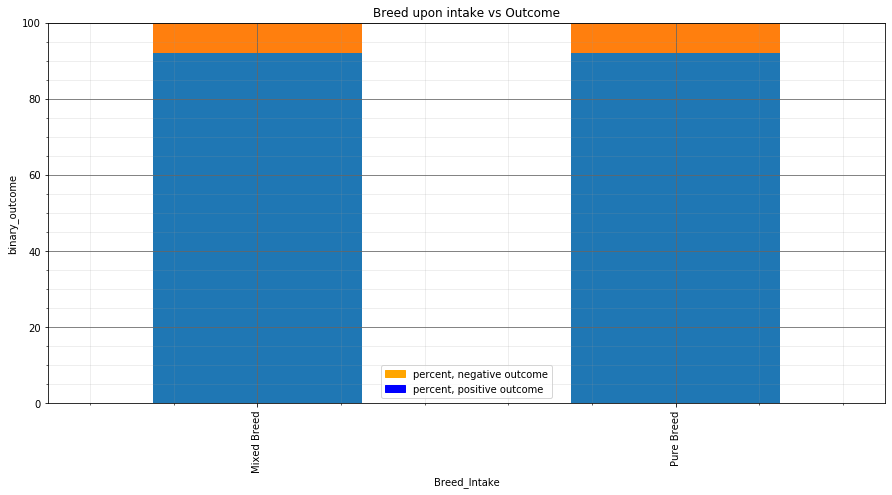

In [111]:
#plot breed against binary outcome
plot_categ_against_outcome(df,'Breed_Intake',"binary_outcome","Breed upon intake vs Outcome")

Name_Provided
Index 	 Count
Yes 	 694
No 	 306


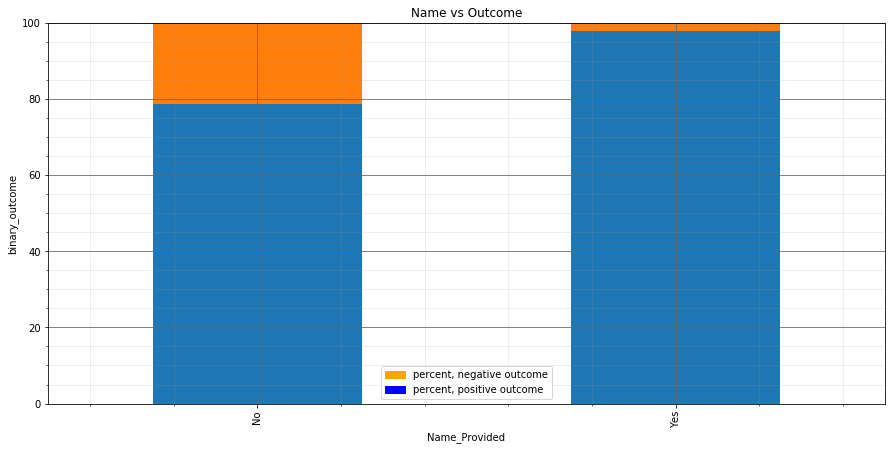

In [112]:
#plot name against binary outcome
plot_categ_against_outcome(df,'Name_Provided',"binary_outcome",'Name vs Outcome')

FoundLocation
Index 	 Count
Austin (TX) 	 820
Travis (TX) 	 85
Manor (TX) 	 22
Outside Jurisdiction 	 10
Pflugerville (TX) 	 22
Webberville (TX) 	 1
Del Valle (TX) 	 29
Creedmoor (TX) 	 1
Leander (TX) 	 2
Round Rock (TX) 	 1
Lago Vista (TX) 	 2
Cedar Park (TX) 	 3
Lakeway (TX) 	 1
Williamson (TX) 	 1


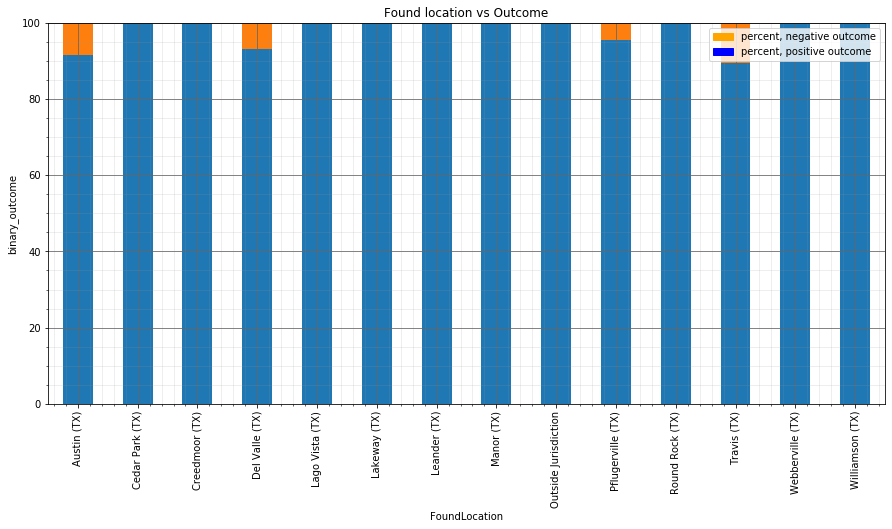

In [113]:
#plot found location against binary outcome
plot_categ_against_outcome(df,'FoundLocation',"binary_outcome", "Found location vs Outcome")

Color_Intake
Index 	 Count
Dark 	 533
Light 	 467


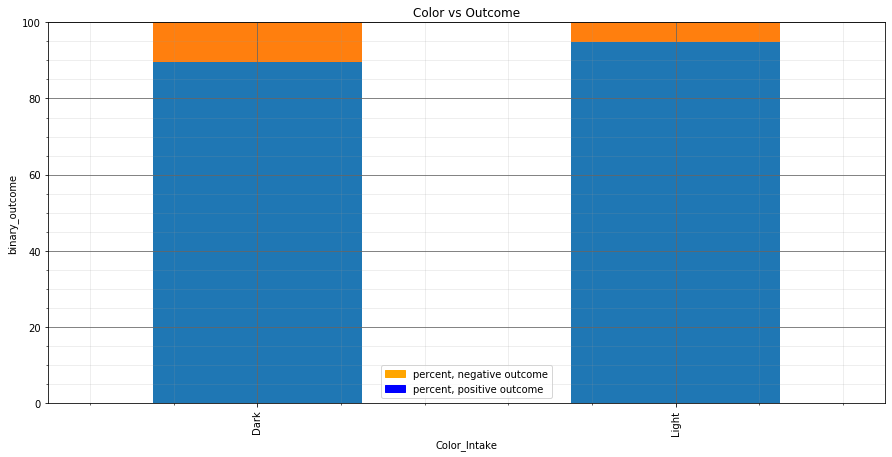

In [114]:
#plot color against binary outcome
plot_categ_against_outcome(df,'Color_Intake',"binary_outcome", "Color vs Outcome")

IntakeType
Index 	 Count
Stray 	 708
Owner Surrender 	 196
Public Assist 	 61
Wildlife 	 34
Euthanasia Request 	 1


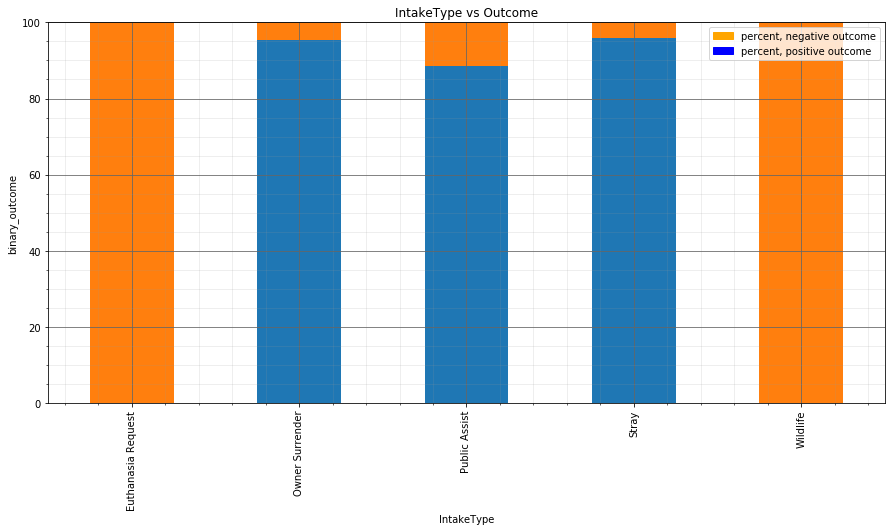

In [115]:
#plot intake type against binary outcome
plot_categ_against_outcome(df,'IntakeType',"binary_outcome","IntakeType vs Outcome")

IntakeCondition
Index 	 Count
Normal 	 892
Injured 	 47
Nursing 	 19
Sick 	 42


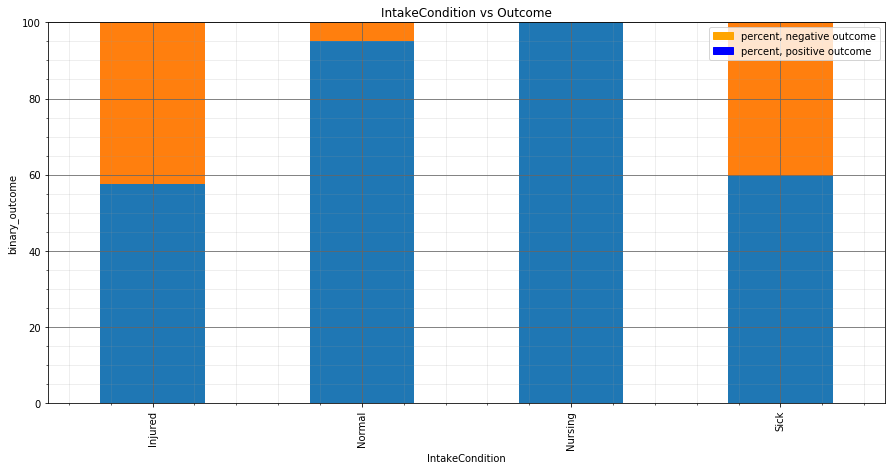

In [116]:
#plot intake condition against binary outcome
plot_categ_against_outcome(df,'IntakeCondition',"binary_outcome","IntakeCondition vs Outcome")

AnimalType_Intake
Index 	 Count
Cat 	 381
Dog 	 563
Other 	 25
Bat 	 26
Bird 	 5


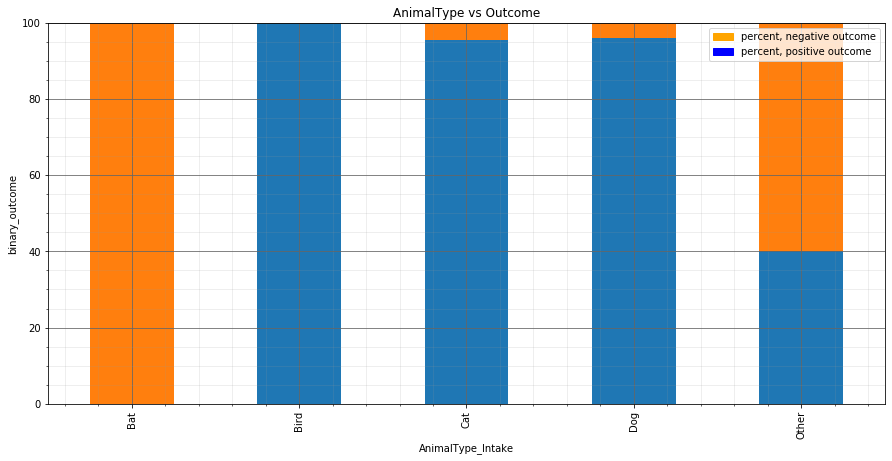

In [117]:
#plot animal type against binary outcome
plot_categ_against_outcome(df,'AnimalType_Intake',"binary_outcome","AnimalType vs Outcome")

SexuponIntake
Index 	 Count
Intact Female 	 312
Intact Male 	 332
Spayed Female 	 129
Neutered Male 	 143
Unknown 	 84


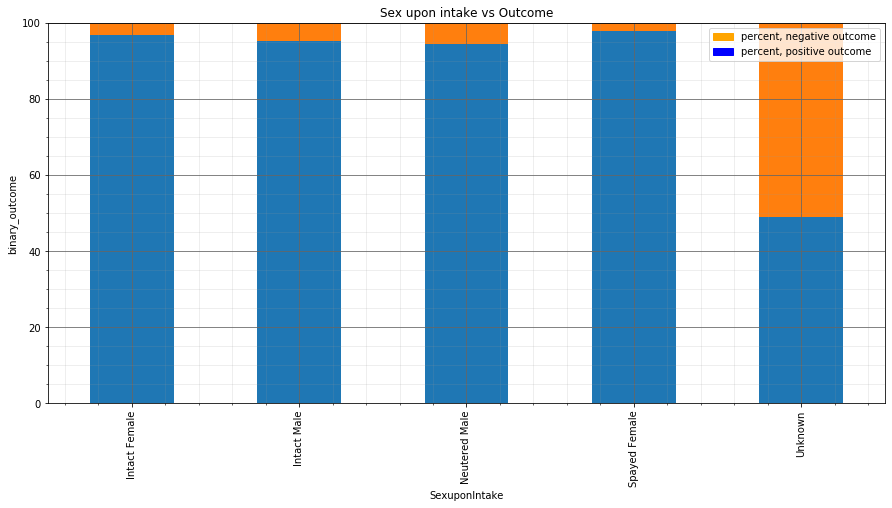

In [118]:
#plot sex upon intake against binary outcome
plot_categ_against_outcome(df,'SexuponIntake',"binary_outcome","Sex upon intake vs Outcome")

SexuponOutcome
Index 	 Count
Spayed Female 	 324
Intact Male 	 129
Neutered Male 	 346
Unknown 	 84
Intact Female 	 117


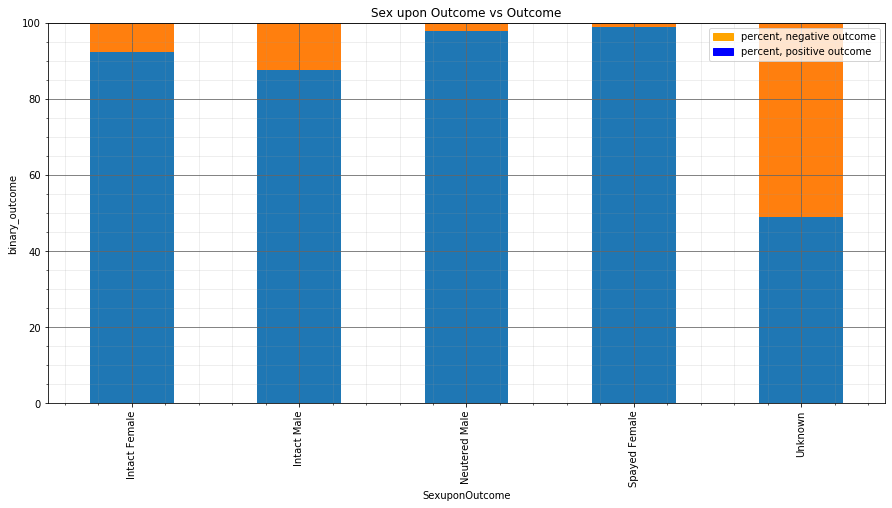

In [119]:
#plot sex upon outcome against binary outcome
plot_categ_against_outcome(df,'SexuponOutcome',"binary_outcome","Sex upon Outcome vs Outcome")

In order to plot *DateTime_Intake* against the outcome we need to extract the month, weekday and hour from it. At this stage in the assignment we will create a new temporary dataframe in which to perform this extraction and explore this information.

In [120]:
#create a new dataframe
month_day_hour_df = pd.DataFrame(
     columns=['DateTime_Intake','DateTime_Outcome', 'binary_outcome'])

In [121]:
#create three features in the new dataframe equal to the features in df
month_day_hour_df['binary_outcome']=df['binary_outcome']
month_day_hour_df['DateTime_Intake']=df['DateTime_Intake']
month_day_hour_df['DateTime_Outcome']=df['DateTime_Outcome']

In [122]:
#extract the month, weekday name and hour
month_day_hour_df['Intake_Month']=month_day_hour_df['DateTime_Intake'].dt.month
month_day_hour_df['Intake_Weekday']=month_day_hour_df['DateTime_Intake'].dt.weekday_name
month_day_hour_df['Intake_Hour']=month_day_hour_df['DateTime_Intake'].dt.hour

Intake_Month
Index 	 Count
8 	 68
12 	 85
9 	 99
2 	 59
11 	 91
7 	 95
5 	 107
10 	 97
3 	 71
6 	 98
4 	 74
1 	 56


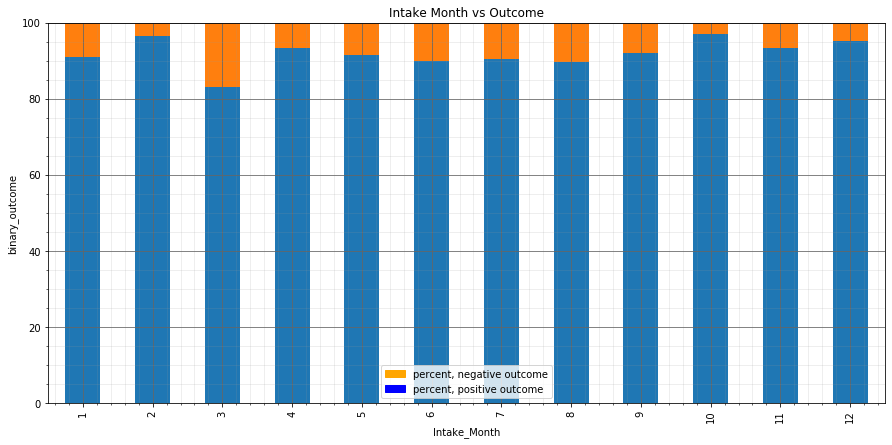

In [123]:
#plot month against outcome
plot_categ_against_outcome(month_day_hour_df,'Intake_Month',"binary_outcome","Intake Month vs Outcome")

Intake_Weekday
Index 	 Count
Saturday 	 142
Sunday 	 133
Tuesday 	 146
Thursday 	 154
Wednesday 	 147
Friday 	 143
Monday 	 135


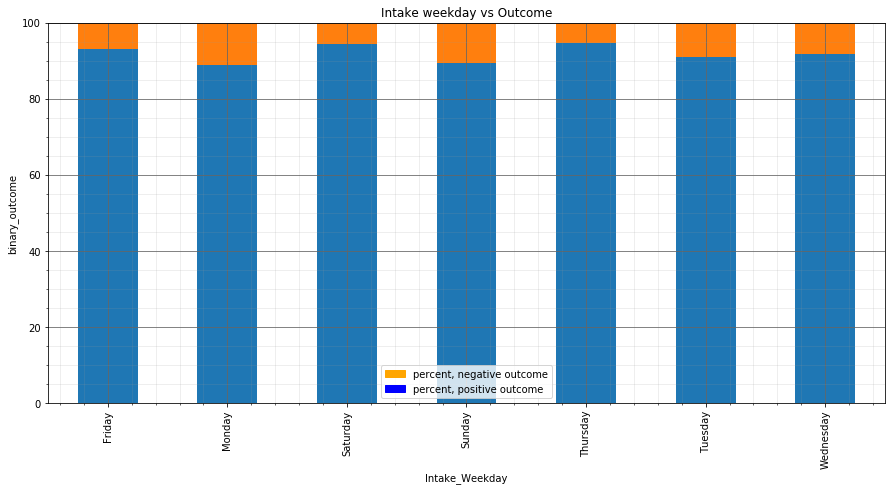

In [124]:
#plot weekday against outcome
plot_categ_against_outcome(month_day_hour_df,'Intake_Weekday',"binary_outcome","Intake weekday vs Outcome")

Intake_Hour
Index 	 Count
17 	 87
11 	 158
12 	 132
13 	 132
16 	 95
18 	 68
14 	 99
10 	 47
9 	 18
7 	 15
15 	 98
23 	 6
1 	 3
19 	 9
0 	 4
20 	 3
8 	 12
22 	 5
6 	 3
21 	 4
2 	 2


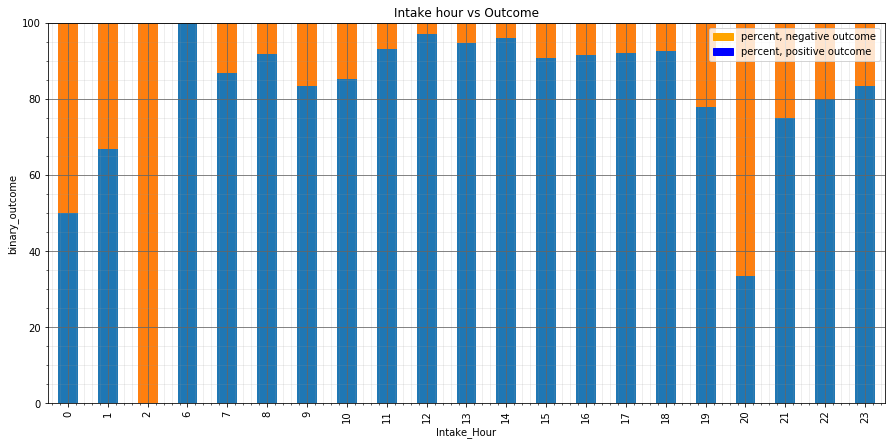

In [125]:
#plot hours against outcome
plot_categ_against_outcome(month_day_hour_df,'Intake_Hour',"binary_outcome", "Intake hour vs Outcome")

The categorical features above were chosen to plot against the outcome as it was expected that all could have an impact on the outcome. We can see the following: 
- There is no correlation between breed and outcome and very little difference in the outcome between dark and light colored animals. I had expected that there would be more of a correlation between breed and outcome.
- Animals are 20% more likely to have a negative outcome if they have no name.
- We see that there are four locations slightly correlated with a negative outcome. However, we can assume that this is because these locations also have the largest number of animals associated with them.
- *Intake_Type* is interesting. As expected, we see that all *Euthenasia Requests* have a negative outcome. However, we also see a very strong relationship between *Wildlife* and outcome. All wildlife have a negative outcome. 
- *Intake_Condition* tells us that sick and injured animals are 40% more likely to have a negative outcome. This is as expected.
- Interestingly in *AnimalType_Intake* we can see that there is a strong correlation between *Bats* and a negative outcome. Similarly, animals of type *Other* have a 60% chance of a negative outcome. 
- In *SexuponIntake* and *SexuponOutcome* we can see that there is no clear difference in outcome between all values excluding *Unknown*. It seems that animals of *Unkown* type have approximately a 50% chance of a negative outcome. 
- There is no clear trend in the plot of month vs outcome initially. We can see that March has the highest likelihood of a negative outcome. This is possible due to it being shortly after Christmas, when people no longer want pets given as Christmas gifts. Although not very significant we can also see that there is a slightly more negative outcome in the summer months. I am assuming that this is because of animal breeding seasons, resulting in more strays entering the shelter.
- In the weekdays we can see that Sunday, Monday, Tuesday and Wednesday have a slightly higher likelihood of a negative outcome. However, overall there is no clear trend. 
- Hour of intake is interesting. It seems that there is a much higher likelihood of a negative outcome if the animal is taken into the shelter during the night, with intake at 2am having a 100% likelihood of a negative outcome. However, on further investigation we can see that the number of animals being dropped in at these times is very low compared to the daylight hours. 

### Categorical vs categorical

Based on the findings in the plots above, we will now plot some categorical features against eachother in order to explore further whether they are indicative of the target otucome. The features chosen to plot against eachother are based on what I assume will have interesting and informative findings.

In [126]:
#This code is adapted from sample solution provided

# create function which takes a dataframe and two features as arguments
def plot_categ_against_categ(df_to_plot, column1, column2):
    
    f = pd.unique(df_to_plot[column1].ravel())
    print(f)
    # add new column and set values to zero
    df_to_plot['percent'] = 0

    #print header
    print(column1)
    print("Index \t Count")

    # loop through each value in the first feature
    for i in f:
        count = df_to_plot[df_to_plot[column1] == i].count()[column2]
        count_percentage = (1 / count) * 100

        # print out index vs count
        print(i, "\t", count)

        index_list = df_to_plot[df_to_plot[column1] == i].index.tolist()

        for ind in index_list:
            df_to_plot.loc[ind, 'percent'] = count_percentage

    group = df_to_plot[['percent', column1, column2]].groupby([column1, column2]).sum()
    
    #plot the results
    my_plot = group.unstack().plot(kind='bar',
                                   stacked=True,
                                   title=  column1 + " vs " + column2,
                                   figsize=(15,5),
                                   grid=True,
                                   color=['#009900', 'red', "orange", "black", "blue", "pink"])


    # add gridlines 
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

    my_plot.set_xlabel(column1)
    my_plot.set_ylabel(column2)
    my_plot.set_ylim([0,100])

**Animal type vs color**

['Cat' 'Dog' 'Other' 'Bat' 'Bird']
AnimalType_Intake
Index 	 Count
Cat 	 381
Dog 	 563
Other 	 25
Bat 	 26
Bird 	 5


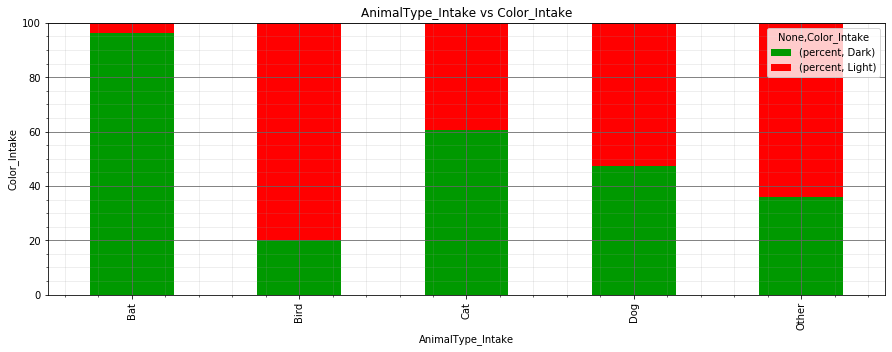

In [127]:
#plot animal type against color
plot_categ_against_categ(df,'AnimalType_Intake','Color_Intake')

We saw in the graphs above that dark animals were approximately 5% more likely to have a negative outcome than light animals. This graph here of animal type vs color helps us understand this finding better. We saw that bats have a 100% likelihood of a negative outcome. Here we can see that approximately 96% of bats are dark. Thus we can assume that the difference in outcome between light and dark animals is due to the bats having a value of *Dark*. 

**Intake type vs name**

['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request']
IntakeType
Index 	 Count
Stray 	 708
Owner Surrender 	 196
Public Assist 	 61
Wildlife 	 34
Euthanasia Request 	 1


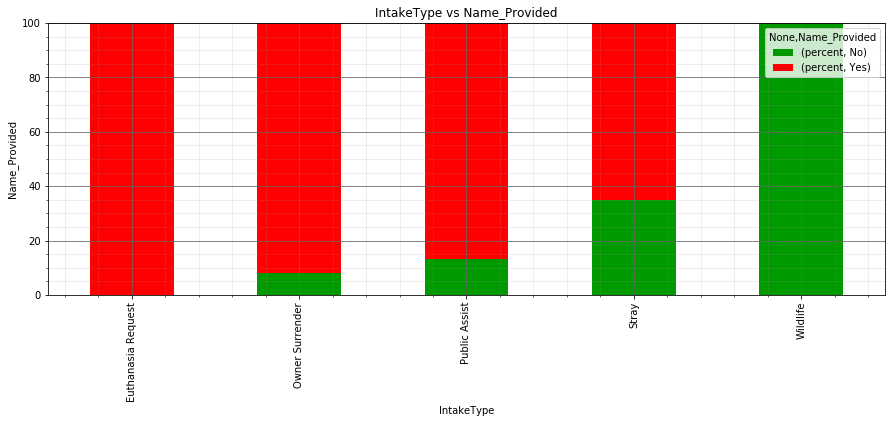

In [128]:
#plot intake type against name
plot_categ_against_categ(df,'IntakeType','Name_Provided')

Wildlife, all of whom have a negative outcome as we saw above, have no name. Strays account for most of the other animals with no name. This makes sense.

**Intake condition vs name**

['Normal' 'Injured' 'Nursing' 'Sick']
IntakeCondition
Index 	 Count
Normal 	 892
Injured 	 47
Nursing 	 19
Sick 	 42


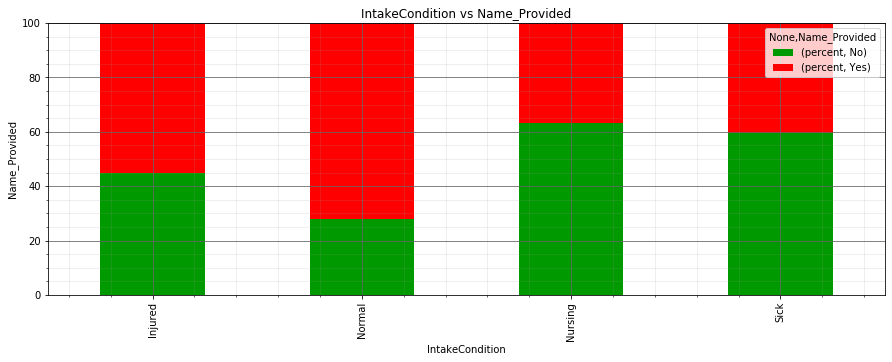

In [129]:
#plot intake condition against name
plot_categ_against_categ(df,'IntakeCondition','Name_Provided')

We can see that there is no clear relationship between intake condition and name.

**Intake condition vs Intake type**

['Normal' 'Injured' 'Nursing' 'Sick']
IntakeCondition
Index 	 Count
Normal 	 892
Injured 	 47
Nursing 	 19
Sick 	 42


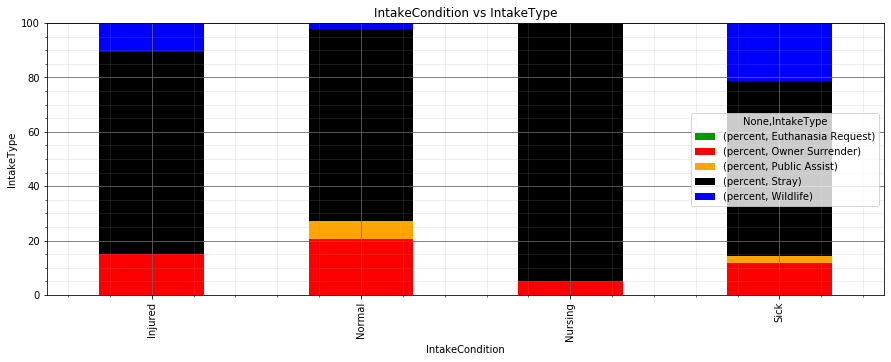

In [130]:
#plot intake condition against intake type
plot_categ_against_categ(df,'IntakeCondition','IntakeType')

We can see that apart from a small number with a value of normal, wildlife are all either sick or injured when entering the shelter. We saw earlier that all wildlife have a negative outcome and that sick/injured animals are 40% more likely to have a negative outcome. Thus it makes sense that this graph shows that wildlife are almost all sick/injured. 

**Animal type vs Intake type**

['Cat' 'Dog' 'Other' 'Bat' 'Bird']
AnimalType_Intake
Index 	 Count
Cat 	 381
Dog 	 563
Other 	 25
Bat 	 26
Bird 	 5


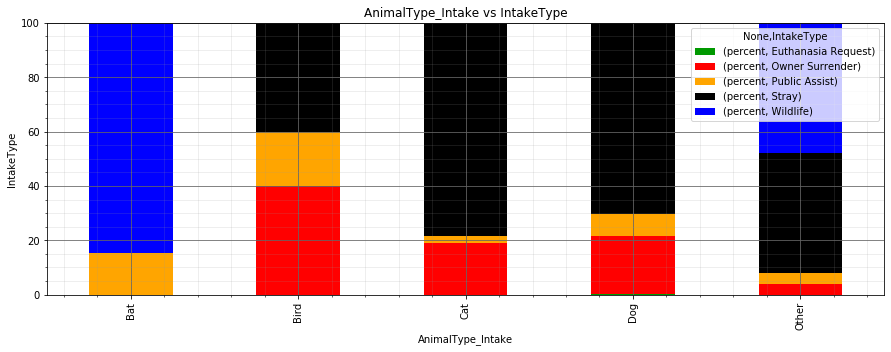

In [131]:
#plot animal type against intake type
plot_categ_against_categ(df,'AnimalType_Intake','IntakeType')

We can see when plotting animal type with intake type that the wildlife all fall into the bat and other values. Again, based on our findings above, this makes sense. 

['Cat' 'Dog' 'Other' 'Bat' 'Bird']
AnimalType_Intake
Index 	 Count
Cat 	 381
Dog 	 563
Other 	 25
Bat 	 26
Bird 	 5


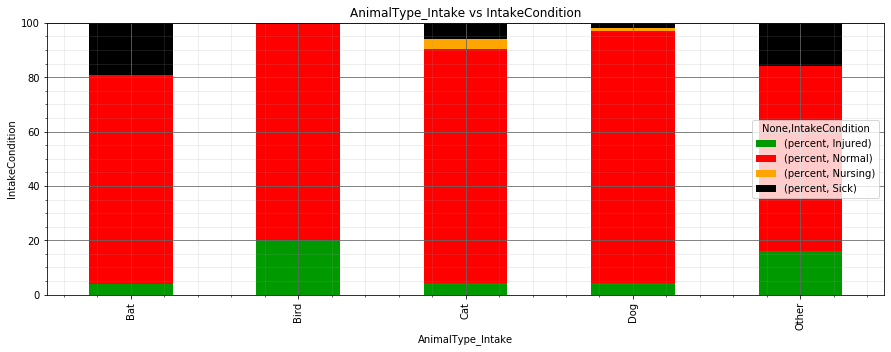

In [132]:
#plot animal intake type against intake condition
plot_categ_against_categ(df,'AnimalType_Intake','IntakeCondition')

The animal type vs intake condition plot also fits with our results from the graphs above. We saw that all birds had a positive outcome and here we can see that the majority of birds are of normal condition. *Bats* and *Other*, who had the worst outcome of all types, have the largest percentage of sick and injured animals. This makes sense. 

**Animal type vs Sex upon intake**

As the sex upon intake and sex upon outcome had similar results above we only need to explore the sex upon intake here.

['Cat' 'Dog' 'Other' 'Bat' 'Bird']
AnimalType_Intake
Index 	 Count
Cat 	 381
Dog 	 563
Other 	 25
Bat 	 26
Bird 	 5


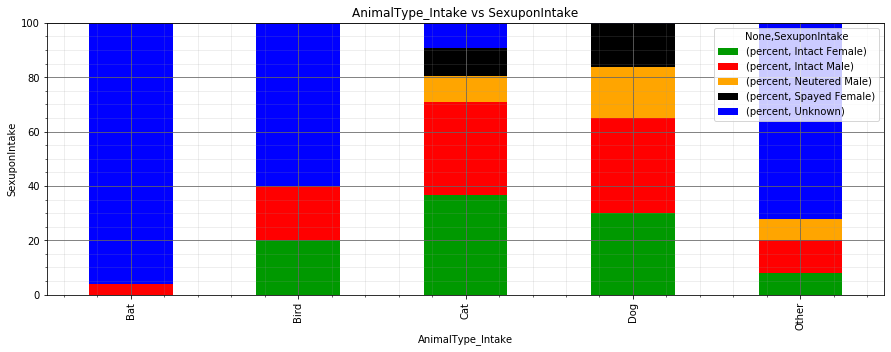

In [133]:
#plot animal type against sex upon intake
plot_categ_against_categ(df,'AnimalType_Intake','SexuponIntake')

We saw above that animals with an unknown sex were 50% more likely to have a negative outcome. We also saw that *Bats* and *Other* are most likely to have a negative outcome of all animal types. It makes sense therefore, that approximately 95% of bats have unknown sex and that approximately 70% of *Other* have unknown sex. Interestingly, even though all birds survived, we can see that approximately 60% have unknown sex. I assume that these fall within the 50% of animals with unknown sex who have a positive outcome.

['Stray' 'Owner Surrender' 'Public Assist' 'Wildlife' 'Euthanasia Request']
IntakeType
Index 	 Count
Stray 	 708
Owner Surrender 	 196
Public Assist 	 61
Wildlife 	 34
Euthanasia Request 	 1


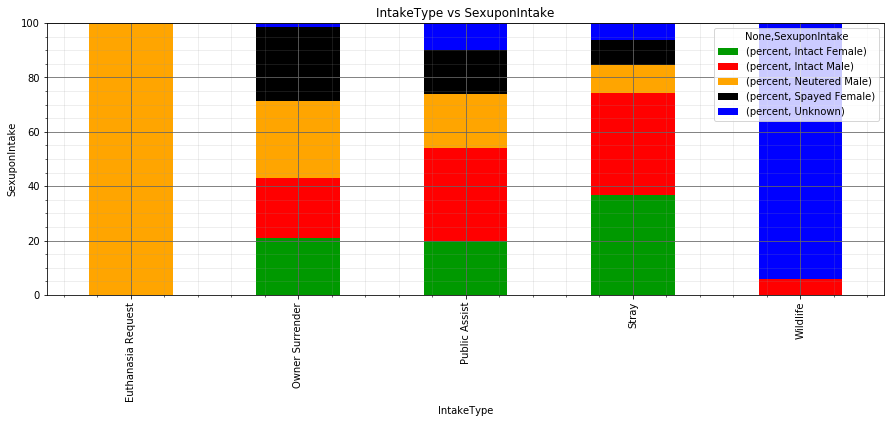

In [134]:
#plot intake type against sex upon intake
plot_categ_against_categ(df,'IntakeType','SexuponIntake')

We can see here that the one euthenasia request was a neutered male. We can see that approximately 95% of wildlife have unknown sex. Again this fits in with our findings above. 

**Further categorical explorations**

We have gained a lot of information about name, intake type, intake condition, animal type and sex from the graphs above. However, we have not extracted a lot of information about cats and dogs, the most frequent animals in the shelter. We will now explore the relationship between these two exclusively and some other features. 

We begin by plotting only *AnimalType_Intake* which is equal to *Cat*. We then explore the relationship between cats and name. This is plotted as it is assumed that people prefer to adopt cats and kittens with names. 

Name_Provided
Index 	 Count
Yes 	 223
No 	 158


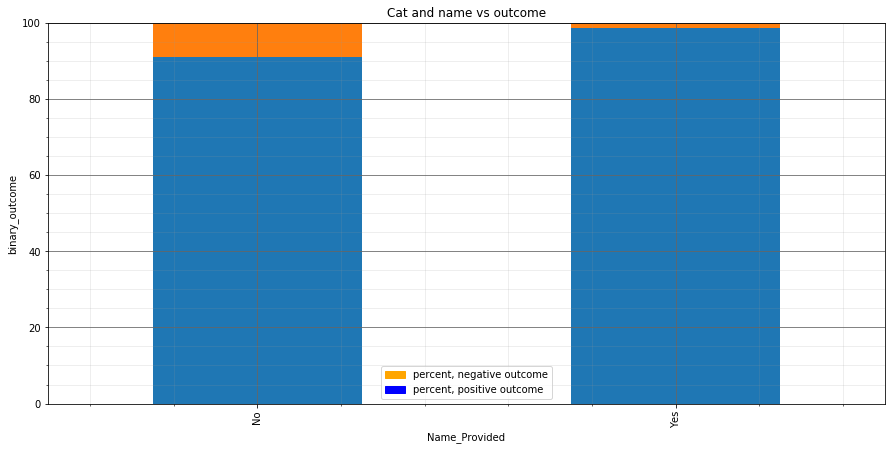

In [135]:
#plot name against outcome for cats only
plot_categ_against_outcome(df[df["AnimalType_Intake"]=="Cat"], "Name_Provided", "binary_outcome","Cat and name vs outcome")

As explected, we can see there is a higher likelihood of a positive outcome when the cat has a name. Another widespread assumption is that darker cats are not as popular as light coloured cats. However, we saw above that the difference in outcome for darker animals was largely accounted for by the bats. As a result, we expect to see very little difference in outcome between dark and light cats. 

Color_Intake
Index 	 Count
Dark 	 231
Light 	 150


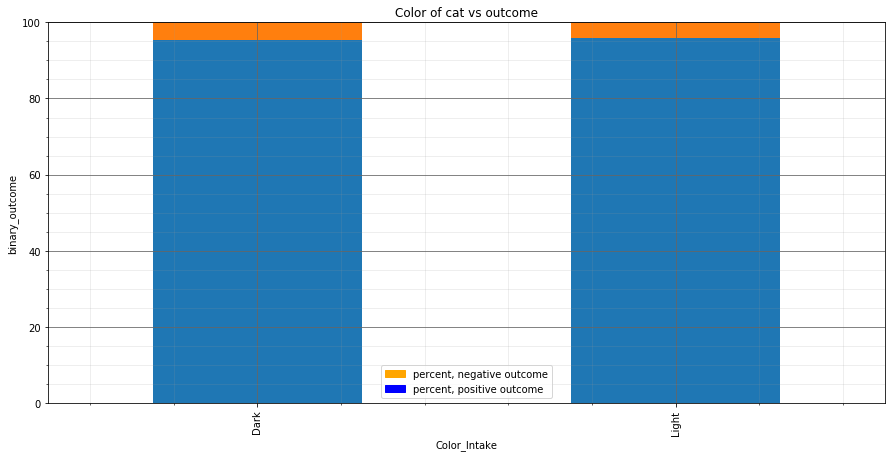

In [136]:
#plot color against outcome for cats only
plot_categ_against_outcome(df[df["AnimalType_Intake"]=="Cat"], "Color_Intake", "binary_outcome", "Color of cat vs outcome")

As expected, we see very little difference between the outcome for dark and light cats. We will now explore the relationship between sex upon intake and the outcome for cats.

SexuponIntake
Index 	 Count
Intact Female 	 139
Intact Male 	 131
Spayed Female 	 40
Neutered Male 	 36
Unknown 	 35


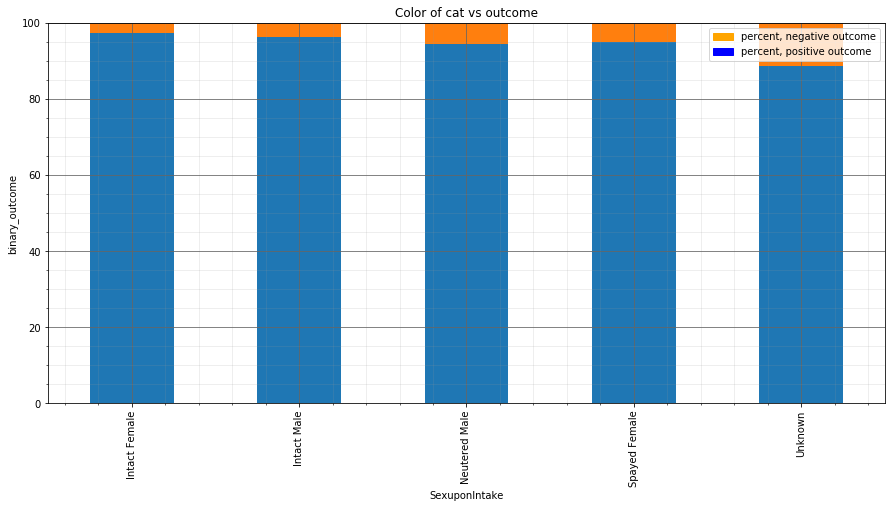

In [137]:
#plot sex upon intake against the outcome for cats only
plot_categ_against_outcome(df[df["AnimalType_Intake"]=="Cat"], "SexuponIntake", "binary_outcome", "Color of cat vs outcome")

As expected, we see that cats who have an unknown sex are less likely to have a positive outcome than those whose sex is known.

Next we will explore dogs a little further in order to further understand the relationship between dogs and other features. Here we plot dogs against breed as it is widely assumed that pure breed dogs are more popular than mixed breed. 

Breed_Intake
Index 	 Count
Mixed Breed 	 397
Pure Breed 	 166


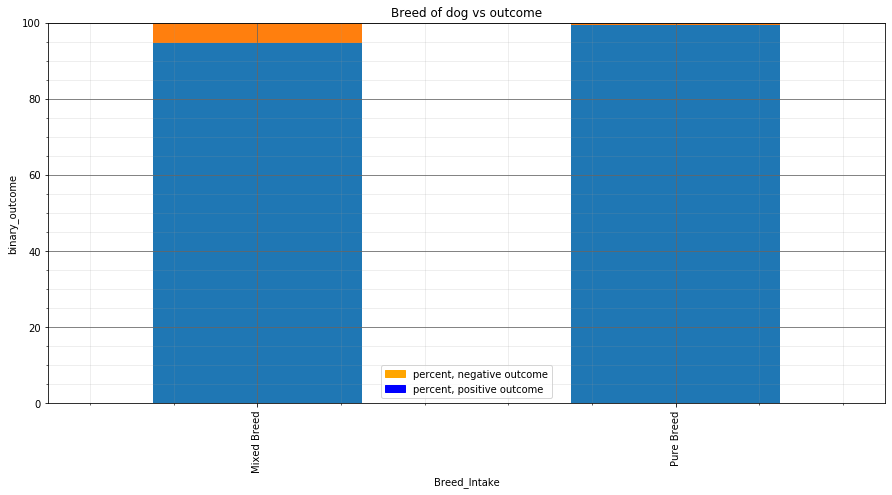

In [138]:
#plot breed against outcome for dogs only
plot_categ_against_outcome(df[df["AnimalType_Intake"]=="Dog"], "Breed_Intake", "binary_outcome", "Breed of dog vs outcome")

We saw above that there was no clear difference in outcome between mixed and pure breeds overall so a large difference was not expected here with dogs. However, as expected we can see that mixed breed dogs are 5% more likely to have a negative outcome. 

### Continuous vs categorical scatter plot

We will now plot age of intake against the binary outcome.

<Figure size 432x288 with 0 Axes>

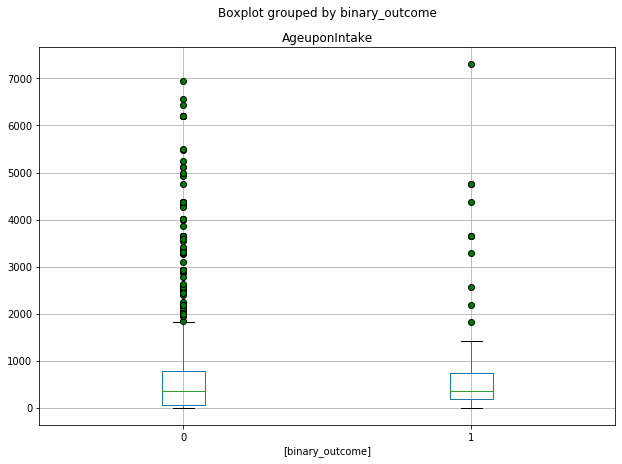

In [139]:
#plot age upon intake against binary outcome
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['AgeuponIntake'], by=['binary_outcome'], flierprops=flierprops, figsize=(10,7))

We see that there is no clear difference between the ages for a negtative and positive outcome. We will now compare the distribution of ages upon intake when the binary outcome is negative to when the binary outcome is positive. 

**Negaitve outcome**

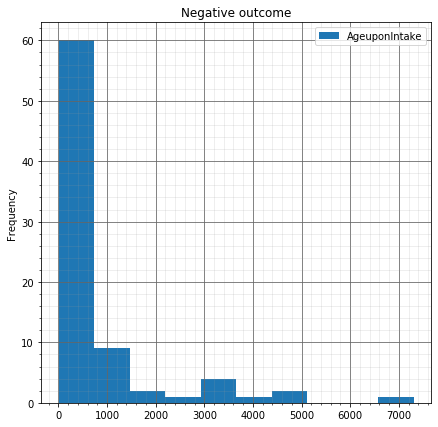

In [140]:
#set binary outcome to 1. This is a negative outcome.
df[df['binary_outcome'] == 1][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative outcome")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

**Positive outcome**

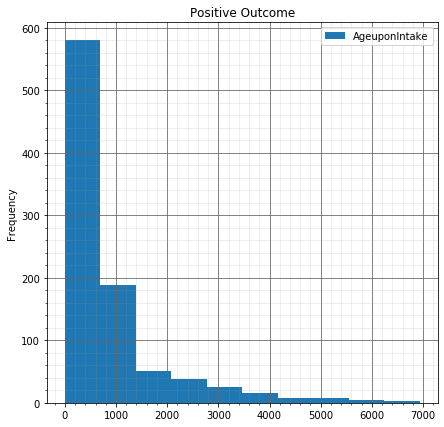

In [141]:
#set binary outcome to 0.This is a positive outcome
df[df['binary_outcome'] == 0][['AgeuponIntake']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive Outcome")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

- We can see that there is no clear difference between the trend of ages for a negative outcome and a positive outcome.
- Both graphs show a very high frequency of young animals. This is most likely because the majority of animals in the shelter are of a young age. 
- The negative outcome has a slightly higher frequency of animals between 3000-4000 years old while the positive outcome shows a higher frequency of animals ages 1000-3000 days. 
- Overall, these graphs do not provide a lot of useful information.
- It seems that age is not a good marker for predicting the binary outcome. 

**Age upon Outcome - negative outcome**

We will now create the same graphs for AgeuponOutcome. We expect a similar result to the AgeuponIntake.

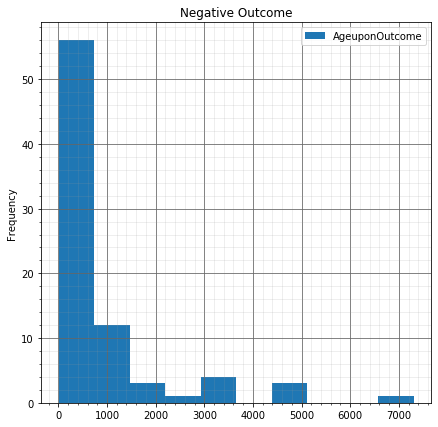

In [142]:
#set binary outcome to 1.
df[df['binary_outcome'] == 1][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Negative Outcome")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

**Positive outcome**

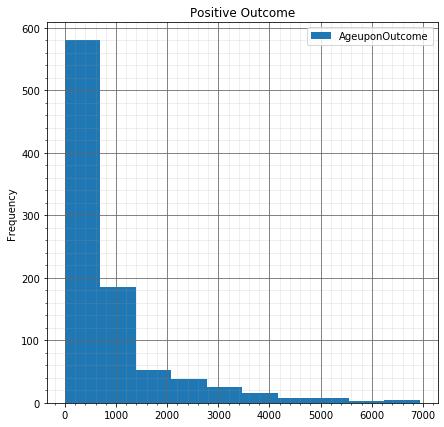

In [143]:
#set binary outcome to zero.
df[df['binary_outcome'] == 0][['AgeuponOutcome']].plot(kind='hist',figsize=(7,7), bins=10, title="Positive Outcome")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

As expected, the graphs for age of outcome portray similar information to the age of intake discussed above. 

### Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

We have discussed in detail the findings of our graphs throughout the above analysis. However, we will now summarise which features are indicative of the binary outcome.

**Categorical features:**
- Some of the findings were not as expected. No relationship was seen between breed and the binary outcome. Similarly, there was only a small difference between the binary outcome for dark and light coloured animals. Thus we conclude that these features are not likely predictors of the outcome. 
- We see a relationship between the name and the binary outcome with animals with no name being 20% more likely to have a negative outcome. Thus name is a likely predictor of outcome. 
- We saw a very strong relationship beteen *IntakeType* and outcome, most notably with the value *Wildlife*. 100% of animals with value *Wildlife* had a negative outcome. As a result, *IntakeType* is a likely predictor of outcome. 
- *IntakeCondition* showed that animals who are sick or injured are 40% more likely to have a negative outcome. This distinction is a likely predictor of outcome. 
- The graphs for animal type showed that animals with value *Bat* and *Other* had a higher likelihood of a negative outcome. This feature is likely a predictor of outcome. 
- We see that when the sex is unknown there is a 50% higher likelihood of a negative outcome. As we saw when plotting categorical features against eachother, this is most likely explained by wildlife having an unknown sex, as we already saw that wildlife have a negative outcome. Furthermore, when the sex is known, there is very little distinction in outcome between the different values. We can conclude that whether or not the sex is known is a likely predictor of outcome. 
- For 'DateTimeIntake' see no clear connection between the month, weekday or hour and the binary outcome. I had expected to see some differences here. These features are not a likely predictor of the outcome.

In conclusion, the categorical features *Name_Provided*, *IntakeType*, *IntakeCondition*, *AnimalType_Intake*, *SexuponIntake* are likely predictors of the binary outcome. For some of these there is a strong case for creating a binary feature, for example whether the sex of the animal is known or not.

**Continuous features:**
- We saw no connection between the age and the outcome so we conclude that age is not a likely predictor of the outcome. This is perhaps due to the uneven distribution of ages in our dataset. This makes a case for creating a new feature which divides the ages into groups.


## (4) - Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome.

Based on our findings throughout this assignment, we will now create some new features which will help with predicting the outcome of the animal.

**New feature 1**

Upon initial exploration of the data it seemed that the feature *SexuponIntake* would be better represented as two features representing the sex and whether the animal was spayed/neutered. However, we saw in part 3 that the only connection between *SexuponIntake* and the binary outcome is whether or not the sex is known. 

Therefore we conclude that splitting the feature will not provide any additional information and that a new binary feature which states whether the sex is known or not will be useful.

In [144]:
#create new feature equal to *SexuponIntake*
df['SexKnown']=df['SexuponIntake']

In [145]:
#check the unique values of the new feature
df['SexKnown'].unique()

[Intact Female, Intact Male, Spayed Female, Neutered Male, Unknown]
Categories (5, object): [Intact Female, Intact Male, Spayed Female, Neutered Male, Unknown]

Next, if the value is unknown we replace it with 0

In [146]:
#replace the value unknown with 0
df['SexKnown'] = df.SexKnown.str.replace(r'(^.*Unknown.*$)', '0')

If the value is not 0, it implies the sex is known so we change it to 1.

In [147]:
# if the value is not 0 set it to 1
df['SexKnown'][df.SexKnown.str.contains('0')==0] = '1'

We convert this new feature to a category type.

In [148]:
#convert the new feature to category type
df['SexKnown'] = df['SexKnown'].astype('category')

Now we will plot this new feature.

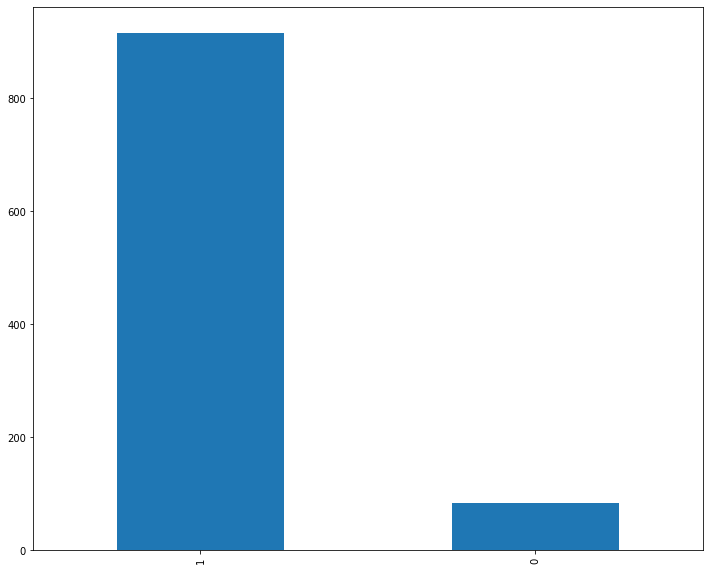

In [149]:
# plot the values of the new feature
df["SexKnown"].value_counts().plot(kind='bar', figsize=(12,10))

Finally we will plot this new feature against the binary outcome.

SexKnown
Index 	 Count
1 	 916
0 	 84


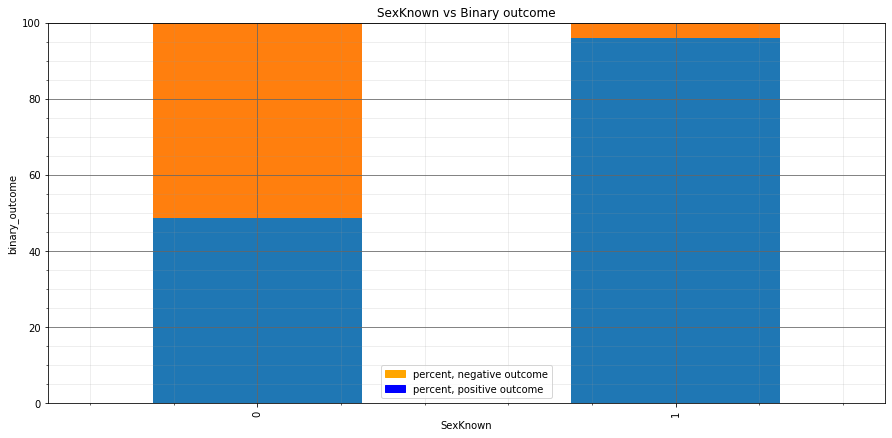

In [150]:
#plot the new feature against binary outcome
plot_categ_against_outcome(df,'SexKnown',"binary_outcome","SexKnown vs Binary outcome")

We can see that animals who have an unknown sex are 50% more likely to have a negative outcome. 

**New feature 2**

We saw above that *Dog* and *Cat* are the most frequent values for the feature *AnimalType_Intake* with 563 and 382 instances, respectively. We also saw that these features had the best outcome, with *Bat* and *Other* have a much higher likelihood of a negative outcome. We also saw that *Bird* has a 100% likelihood of a positive outcome however, given the low frequency of bird we will not consider it here for this new feature. 

Given the frequency of *Dog* and *Cat* and the likelihood of a positive outcome, a new binary feature which represents whether the animal is a dog/cat or not will be helpful. 

In [151]:
#create new feature and set it equal to AnimalType_Intake
df['CatOrDog']=df['AnimalType_Intake']

We replace the word 'Cat' with a value of 1.

In [152]:
#replace all occurrences of cat with 1
df['CatOrDog'] = df.CatOrDog.str.replace(r'(^.*Cat.*$)', '1')

We also replace the word 'Dog' with a value of 1.

In [153]:
#replace all occurrences of dog with 1
df['CatOrDog'] = df.CatOrDog.str.replace(r'(^.*Dog.*$)', '1')

Next, if the value is not a 1 this means it is not a dog or a cat, so we replace it with 0.

In [154]:
# if the value is not 1 replace with 0
df['CatOrDog'][df.CatOrDog.str.contains('1')==0] = '0'

We now convert this new feature to a category type.

In [155]:
#convert new feature to category type
df['CatOrDog'] = df['CatOrDog'].astype('category')

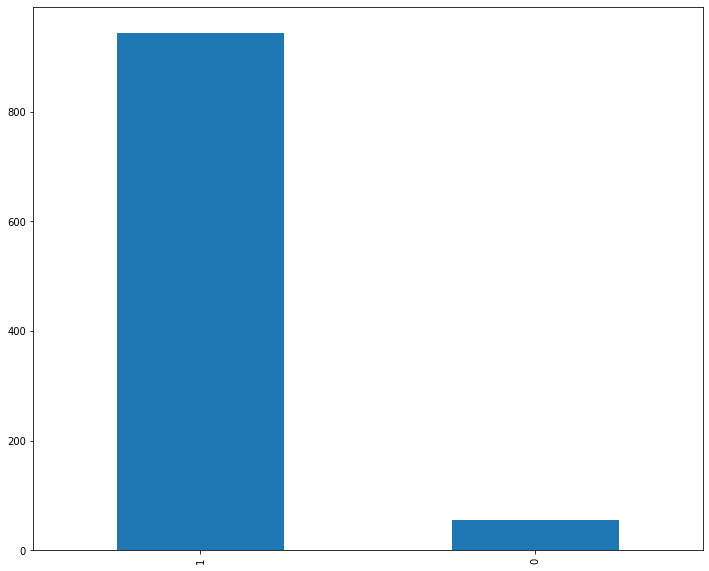

In [156]:
#plot the new feature
df["CatOrDog"].value_counts().plot(kind='bar', figsize=(12,10))

Finally, we plot this feature against the binary outcome.

CatOrDog
Index 	 Count
1 	 944
0 	 56


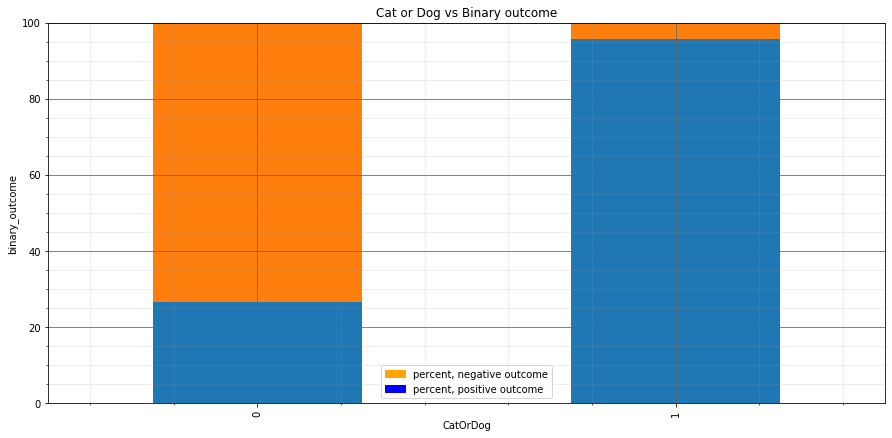

In [157]:
#plot the new feature against the binary outcome
plot_categ_against_outcome(df,'CatOrDog',"binary_outcome","Cat or Dog vs Binary outcome")

We can see that if the animal is a dog or a cat they are approximately 70% more likely to have a positive outcome. Therefore we can conclude that this new feature is a good indicator of the outcome.

**New feature 3**

We saw in part 3 that the *AgeuponIntake* is not a likely predictor for the outcome. However, we also saw throughout the assignment that the distribution of ages is not even and that approximately 700 out of 1000 animals are aged below 1000 days. Therefore, although we can see that there is no relationship between increasing age and the outcome, it would be more useful to be able to group the ages in such a way that the frequency of younger animals is not affecting the investigaiton. 

As a result, for this new feature we will bin the ages. As we do not have an equal distribution of ages, we will bin the ages using equal-frequency binning. As described in the text book, this means that we can more accurately visualise the values which are more heavily populated within this feature. Each bin will have the same number of instances within it. Although binning can lose some information within the feature, it will allow us to more accurately explore the relationship between different ages and the outcome.  

In [158]:
# create ten bins of equal frequency
df['AgeIntake_bins'] = pd.qcut(df.AgeuponIntake,10)

AgeIntake_bins
Index 	 Count
(55.8, 92.0] 	 111
(365.0, 427.6] 	 39
(212.0, 365.0] 	 160
(730.0, 1096.0] 	 116
(2191.0, 7305.0] 	 99
(1096.0, 2191.0] 	 82
(92.0, 212.0] 	 90
(427.6, 730.0] 	 103
(26.9, 55.8] 	 100
(-0.001, 26.9] 	 100


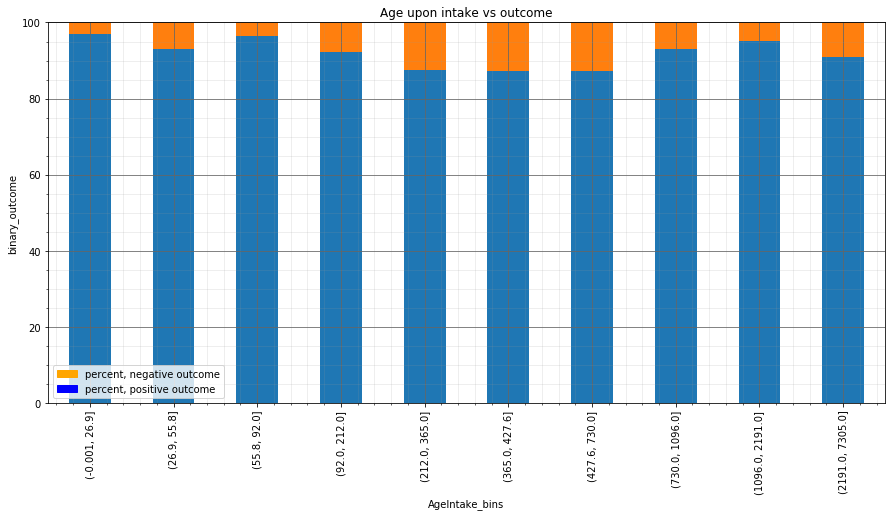

In [159]:
#plot the bins against the binary outcome
plot_categ_against_outcome(df,'AgeIntake_bins',"binary_outcome","Age upon intake vs outcome")

Now that each bin has the same number of instances within it, we can see that there is not as much variation as expected between the different ages. However, we can see that animals between 212 and 730 days have the highest likelihood of a negative outcome.

**Feature 4**

We saw above in part 3 that the only connection between *IntakeCondition* and outcome was seen for the values *Sick* and *Injured*. Animals with either of these values were 40% more likely to have a negative outcome than animals with the other values. Thus, I have concluded that it would be helpful to have a binary feature which describes whether an animal is sick or injured. 

In [160]:
#create a new feature and set it equal to the feature IntakeCondition
df['SickOrInjured']=df['IntakeCondition']

In [161]:
#view the unique values for this new features
df['SickOrInjured'].unique()

[Normal, Injured, Nursing, Sick]
Categories (4, object): [Normal, Injured, Nursing, Sick]

If the feature contains the words 'Sick' or 'Injured' we now convert them to a value of 1.

In [162]:
#use regex to replace sick with 1
df['SickOrInjured'] = df.SickOrInjured.str.replace(r'(^.*Sick.*$)', '1')

In [163]:
#use regex to replace injured with 1
df['SickOrInjured'] = df.SickOrInjured.str.replace(r'(^.*Injured.*$)', '1')

Next, if the value is not 1 it means the animal is not sick or injured so we set the value to 0.

In [164]:
#replace a value of 1 with 0.
df['SickOrInjured'][df.SickOrInjured.str.contains('1')==0] = '0'

We now convert the new feature to a category type.

In [165]:
#convert to category type.
df['SickOrInjured'] = df['SickOrInjured'].astype('category')

Next we plot the new feature.

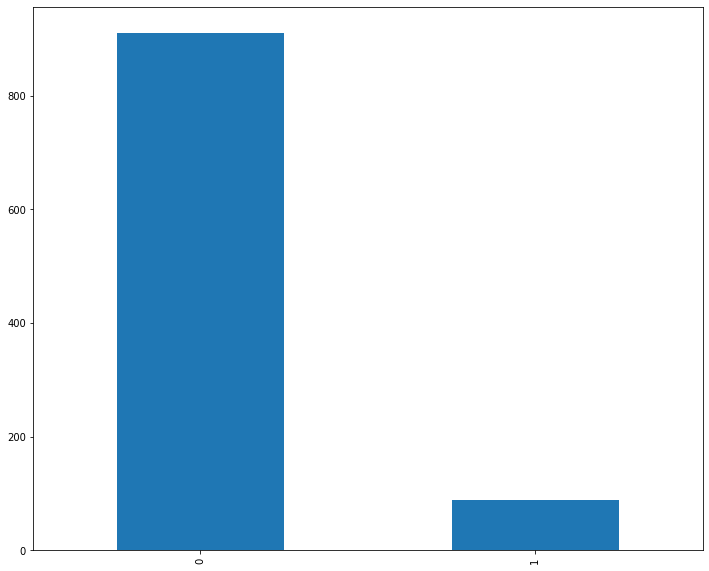

In [166]:
#plot feature
df["SickOrInjured"].value_counts().plot(kind='bar', figsize=(12,10))

Finally, we plot the new feature against the binary outcome.

SickOrInjured
Index 	 Count
0 	 911
1 	 89


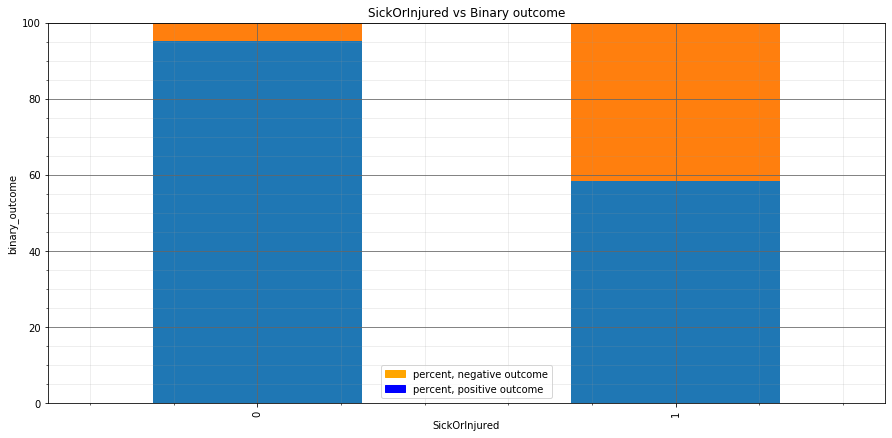

In [167]:
#plot new feature against the binary outcome
plot_categ_against_outcome(df,'SickOrInjured',"binary_outcome","SickOrInjured vs Binary outcome")

We will now create a table of ddescriptive statistics which will include the new features we have just made. 

We will first create a table for the categorical features. 

In [168]:
#create table of statistics for the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
Name_Provided,1000,2,Yes,694
FoundLocation,1000,14,Austin (TX),820
IntakeType,1000,5,Stray,708
IntakeCondition,1000,4,Normal,892
AnimalType_Intake,1000,5,Dog,563
SexuponIntake,1000,5,Intact Male,332
Breed_Intake,1000,2,Mixed Breed,760
Color_Intake,1000,2,Dark,533
SexuponOutcome,1000,5,Neutered Male,346
binary_outcome,1000,2,0,920


Although the table of descriptive statistics for the continuous features will have no changed we will conclude by displaying it below

In [169]:
#create table of statistics for the continuous features
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
AgeuponIntake,1000.0,759.812,1116.589203,0.0,68.00,365.0,765.25,7305.0
AgeuponOutcome,1000.0,781.955,1124.826147,0.0,86.75,367.0,808.25,7306.0


The dataframe with the new features is now saved to a csv file. 

In [170]:
#write cleaned dataframe to a csv file
df.to_csv('19205514_cleaned_new_features_added.csv', index=False)